In [5]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import networkx as nx
import scipy.linalg as la
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
from sklearn import random_projection
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


In [2]:
X, labels = make_circles(n_samples=500, noise=0.1, factor=0.4)
color = ['bo','go', 'ro', 'co', 'mo', 'yo', 'ko','wo']

K-means algorithm

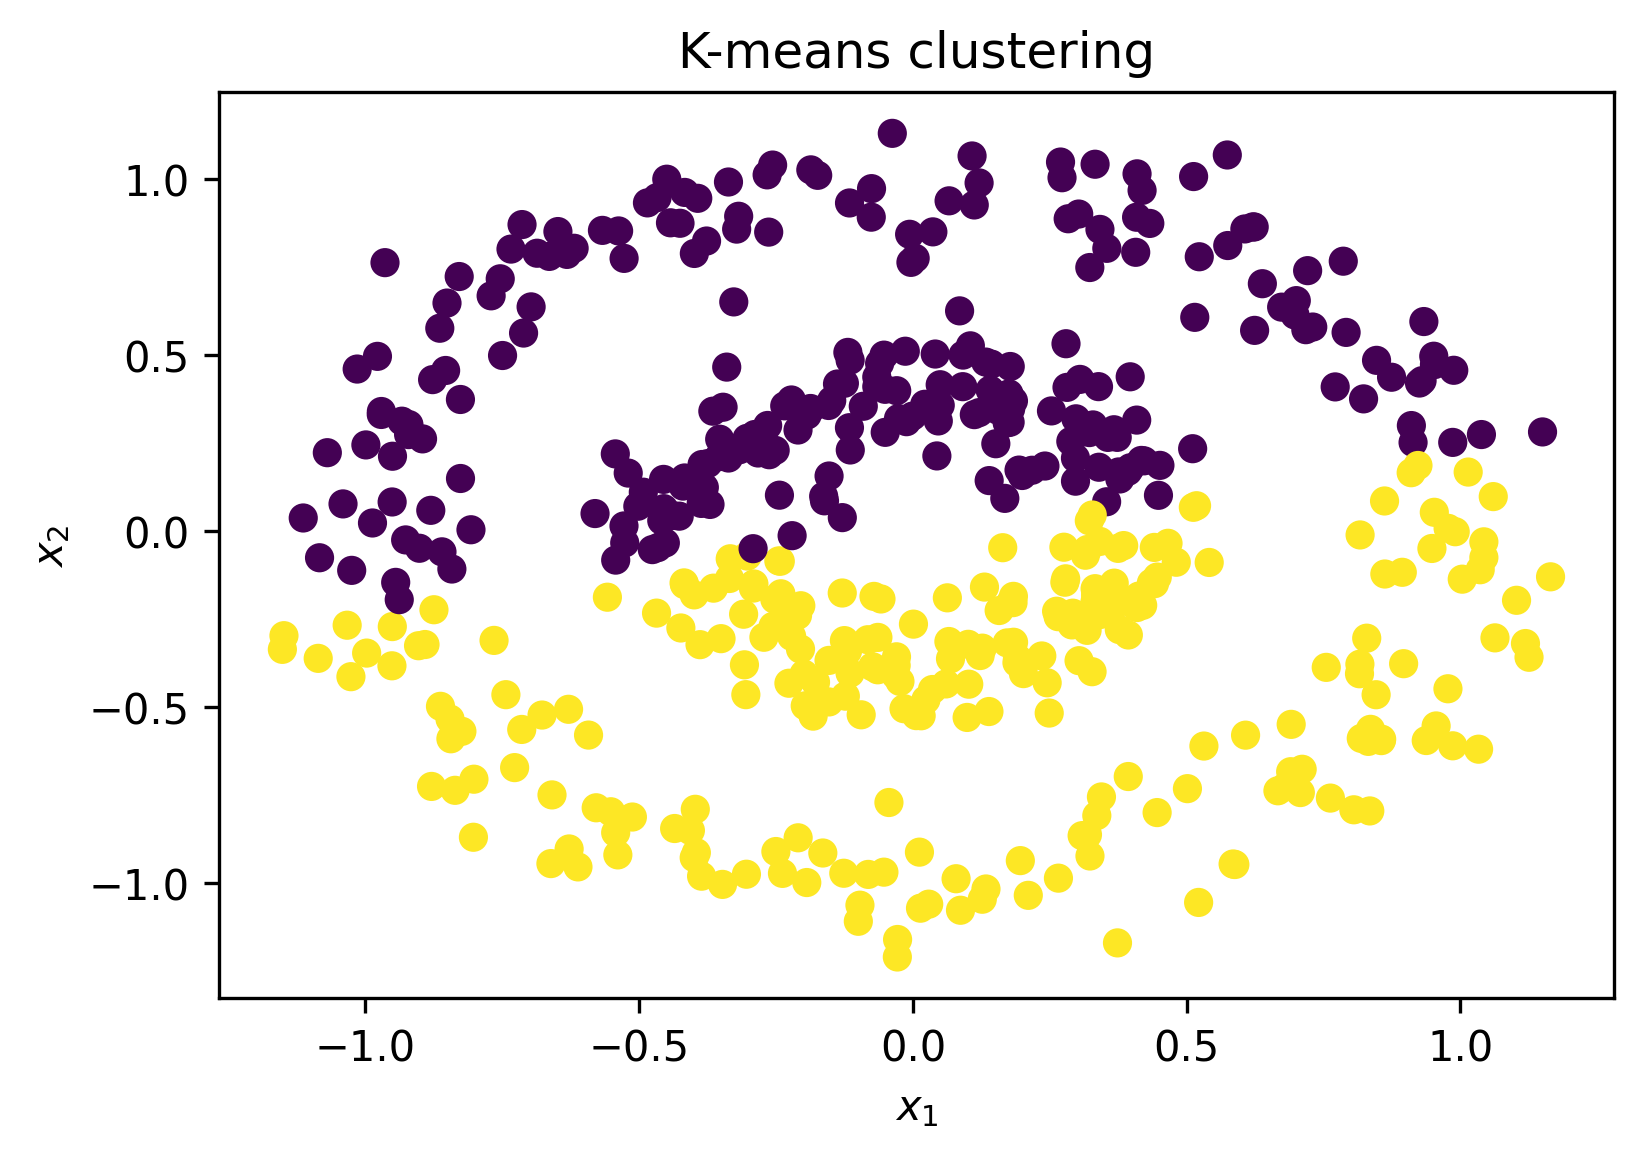

In [6]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
label_kmeans = kmeans.labels_
plt.scatter(x=X[:, 0], y=X[:, 1], c=label_kmeans)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("K-means clustering")
plt.show()

Normalized spectral clustering 

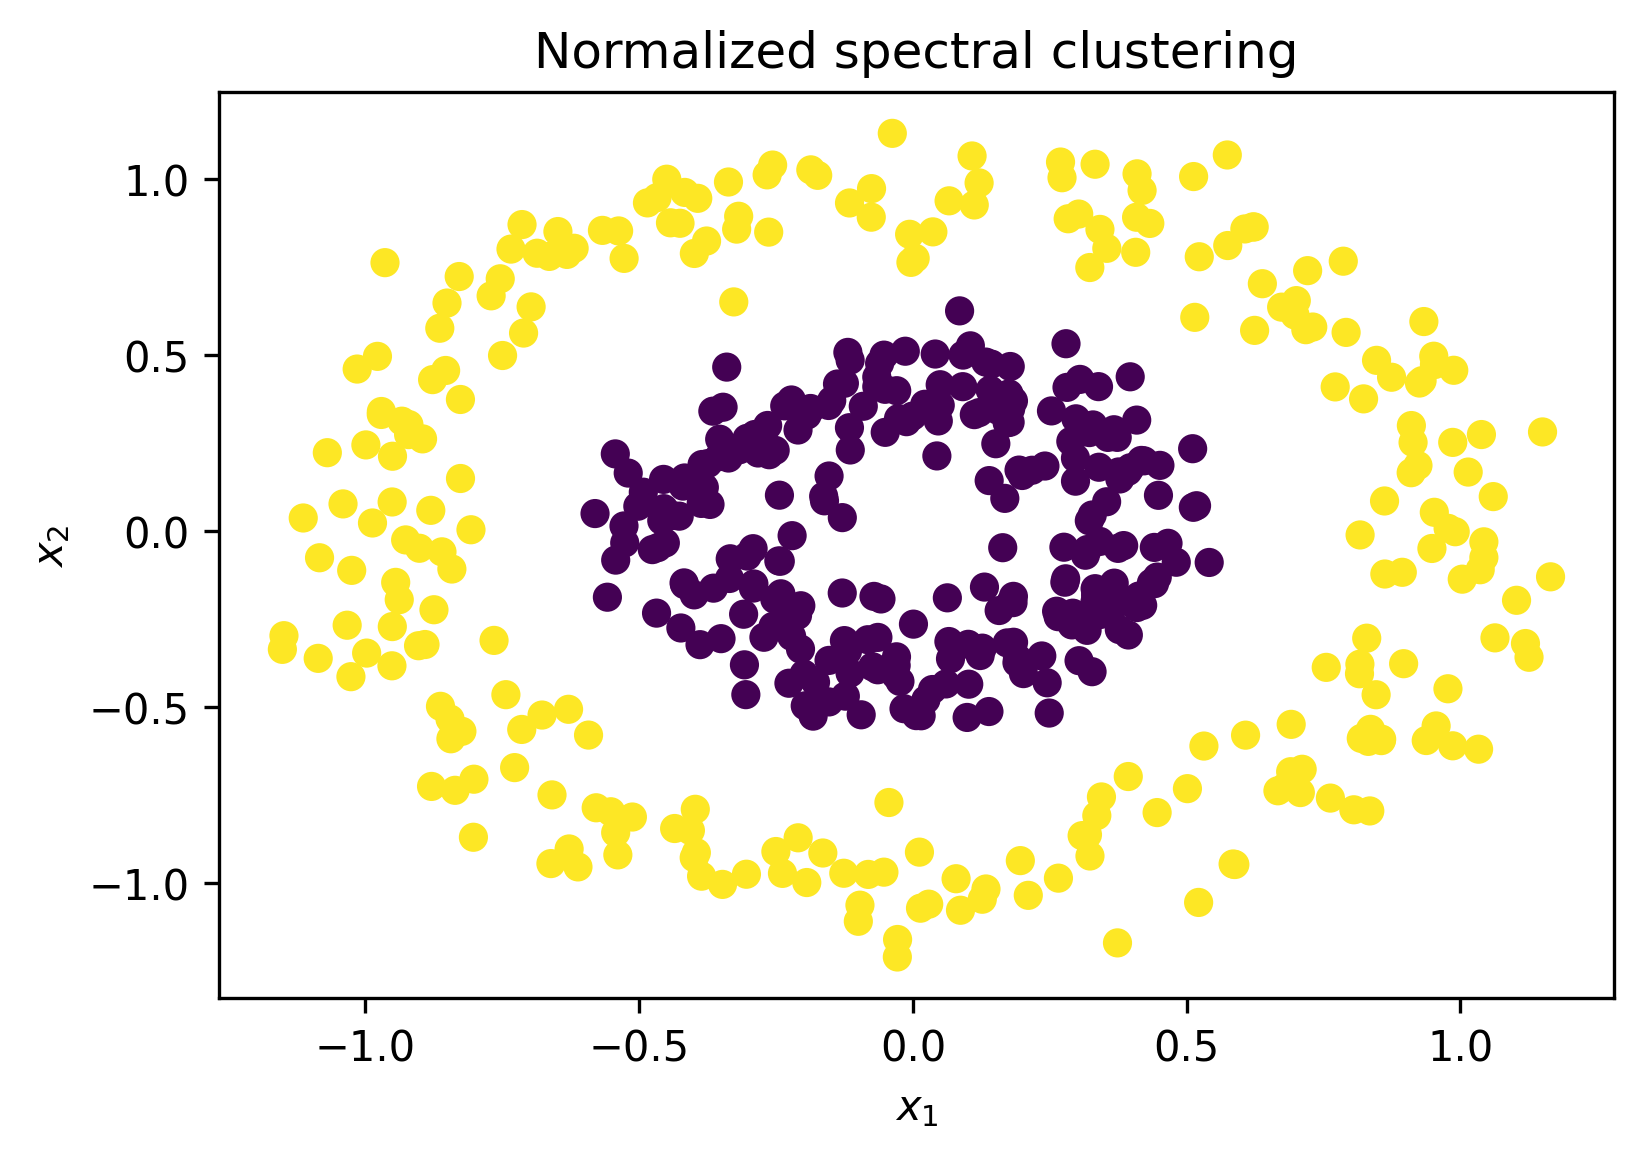

In [7]:
spec_cluster = cluster.SpectralClustering(n_clusters=2,
                                eigen_solver='arpack',
                                affinity='nearest_neighbors',
                                n_neighbors=10)
spec_cluster.fit(X)
label_sc = spec_cluster.labels_
plt.scatter(x=X[:, 0], y=X[:, 1], c=label_sc)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Normalized spectral clustering")
plt.show()


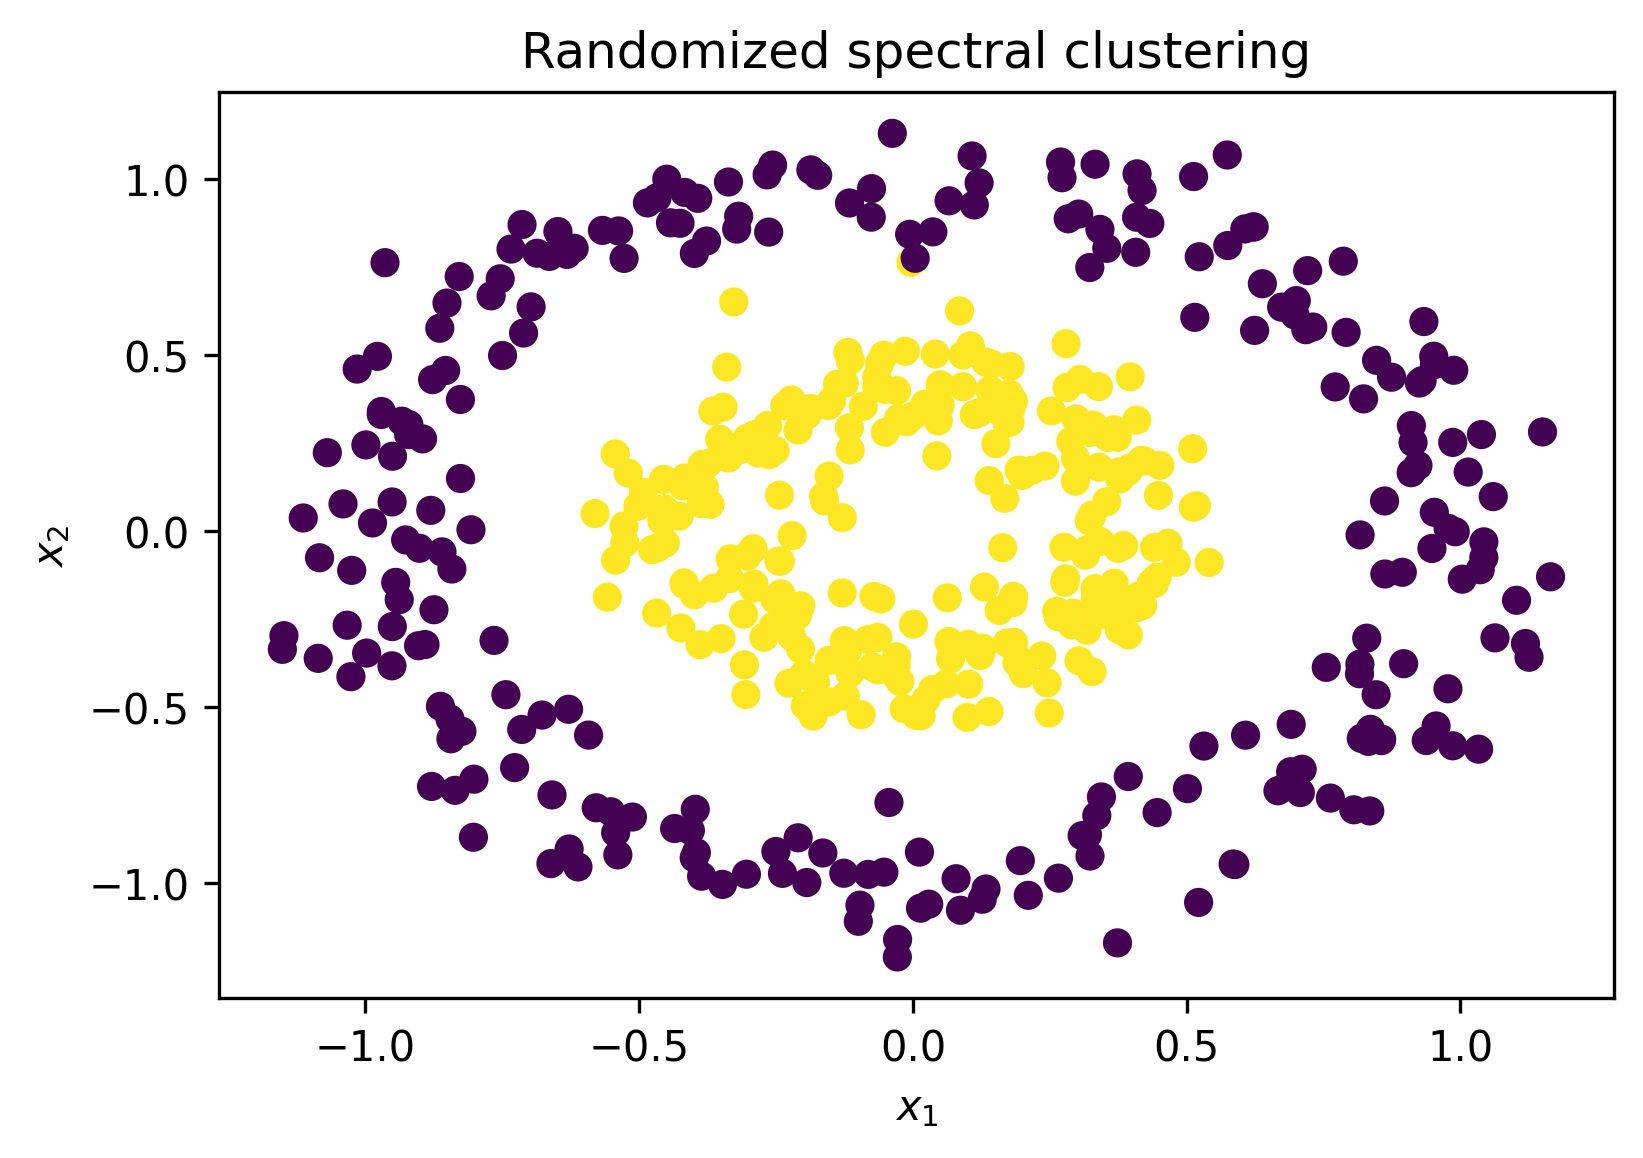

In [43]:
K = 2

Adj_mat = kneighbors_graph(X, n_neighbors=10).toarray()
# print(A)

n = np.shape(Adj_mat)[0]
D = np.diag(np.sum(Adj_mat, axis=1))
L = D - Adj_mat

D_inv = np.diag(1/np.sqrt(np.diag(D)))
L_norm = np.eye(n) - np.dot(D_inv, Adj_mat).dot(D_inv)
Lambdas, V = np.linalg.eig(L_norm)
ind = np.argsort(np.linalg.norm(np.reshape(Lambdas, (1, len(Lambdas))), axis=0))

V_2K = np.real(V[:, ind[:2*K]])

rng = np.random.RandomState(42)
h = int(5*(np.log(K)))
transformer = random_projection.GaussianRandomProjection(n_components = h, random_state=rng)
V_h = transformer.fit_transform(V_2K)

def random_ball(num_points, dimension, radius=1):
    from numpy import random, linalg
    # First generate random directions by normalizing the length of a
    # vector of random-normal values (these distribute evenly on ball).
    random_directions = random.normal(size=(dimension,num_points))
    random_directions /= linalg.norm(random_directions, axis=0)
    # Second generate a random radius with probability proportional to
    # the surface area of a ball with a given radius.
    random_radii = random.random(num_points) ** (1/dimension)
    # Return the list of random (direction & length) points.
    return radius * (random_directions * random_radii).T

centroids = random_ball(K, h)
norm_V = V_h/(np.linalg.norm(V_h,axis=1).reshape(-1,1))

r = np.shape(centroids)[0]
dist = np.zeros((n,r))
for i in range(r):
    dist[:,i] = np.linalg.norm(norm_V - centroids[i,:],axis=1)

label_1 = np.argmin(dist,axis=1)

# label_1[label_1 == 3] = 1
plt.scatter(x=X[:, 0], y=X[:, 1], c=label_1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Randomized spectral clustering")
plt.show()

# plt.colorbar()


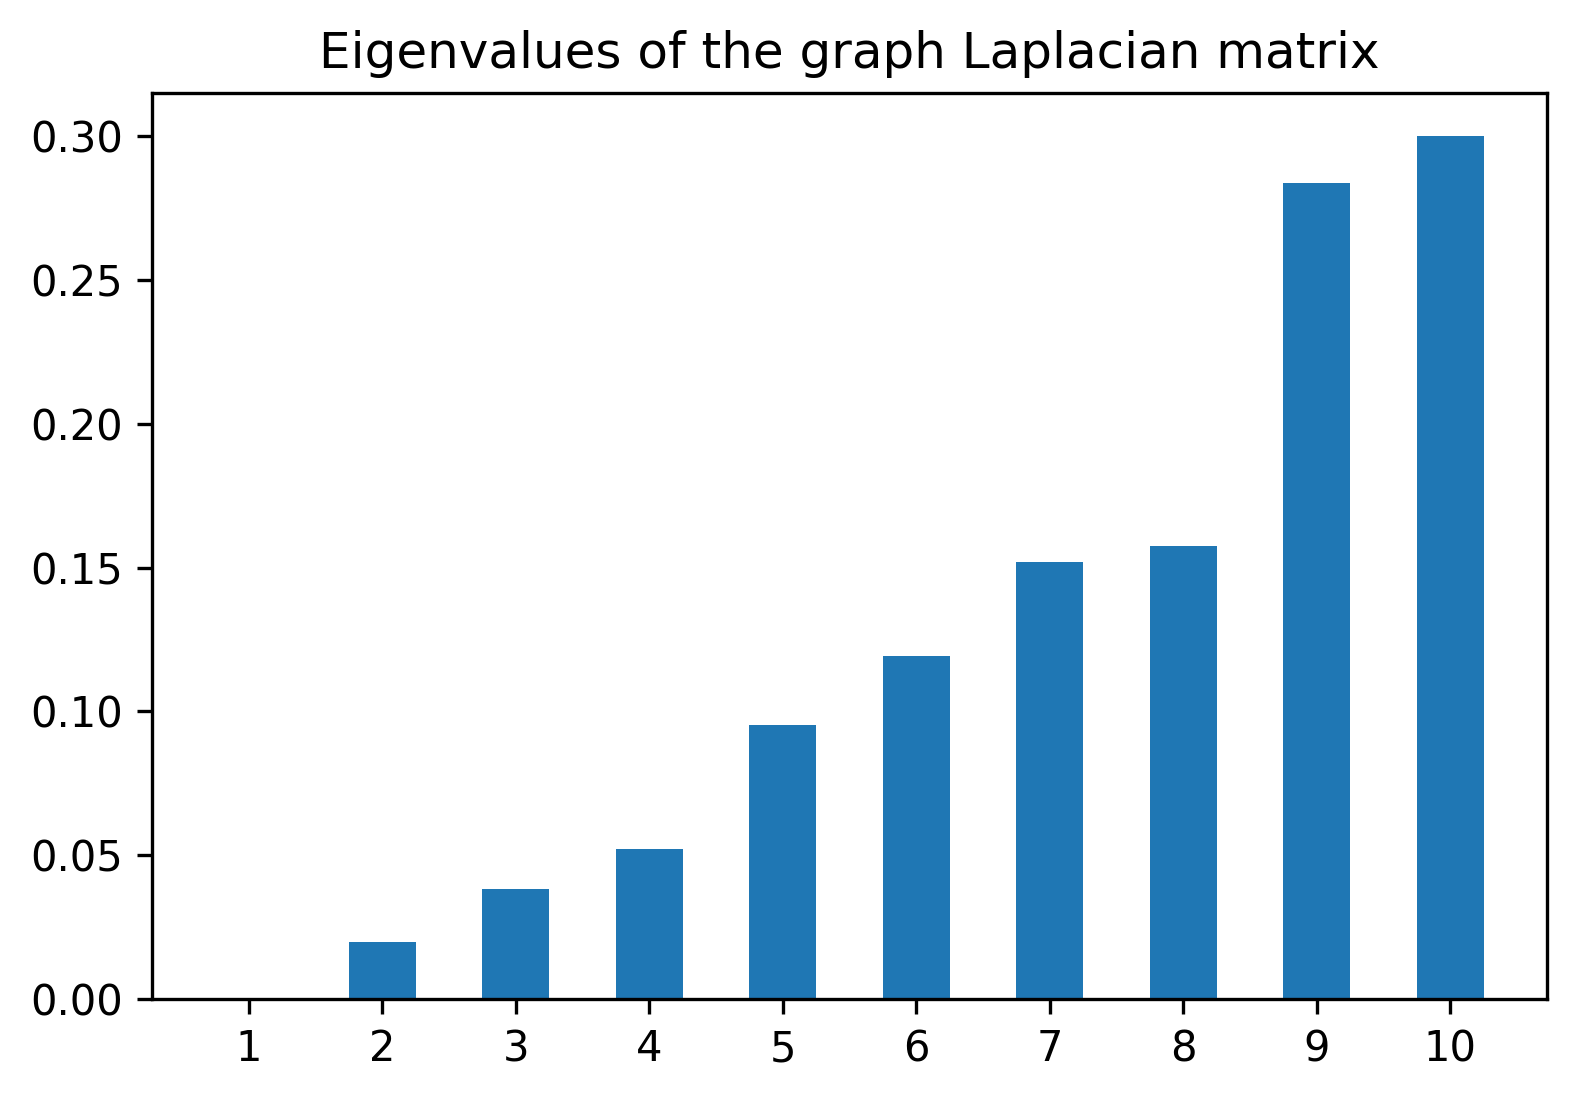

In [47]:
W = spec_cluster.affinity_matrix_
d=np.reshape(np.array(W.sum(axis=0)),n)
D_sc=np.diag(d)
L_sc = D_sc - W
eig_vals, U = np.linalg.eigh(L_sc)
num_eigs = 10
plt.bar(1+np.arange(num_eigs),eig_vals[:num_eigs],width=0.5,align='center')
plt.xticks(1+np.arange(num_eigs))
plt.title("Eigenvalues of the graph Laplacian matrix")
plt.show()


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 500 and the array at index 1 has size 1

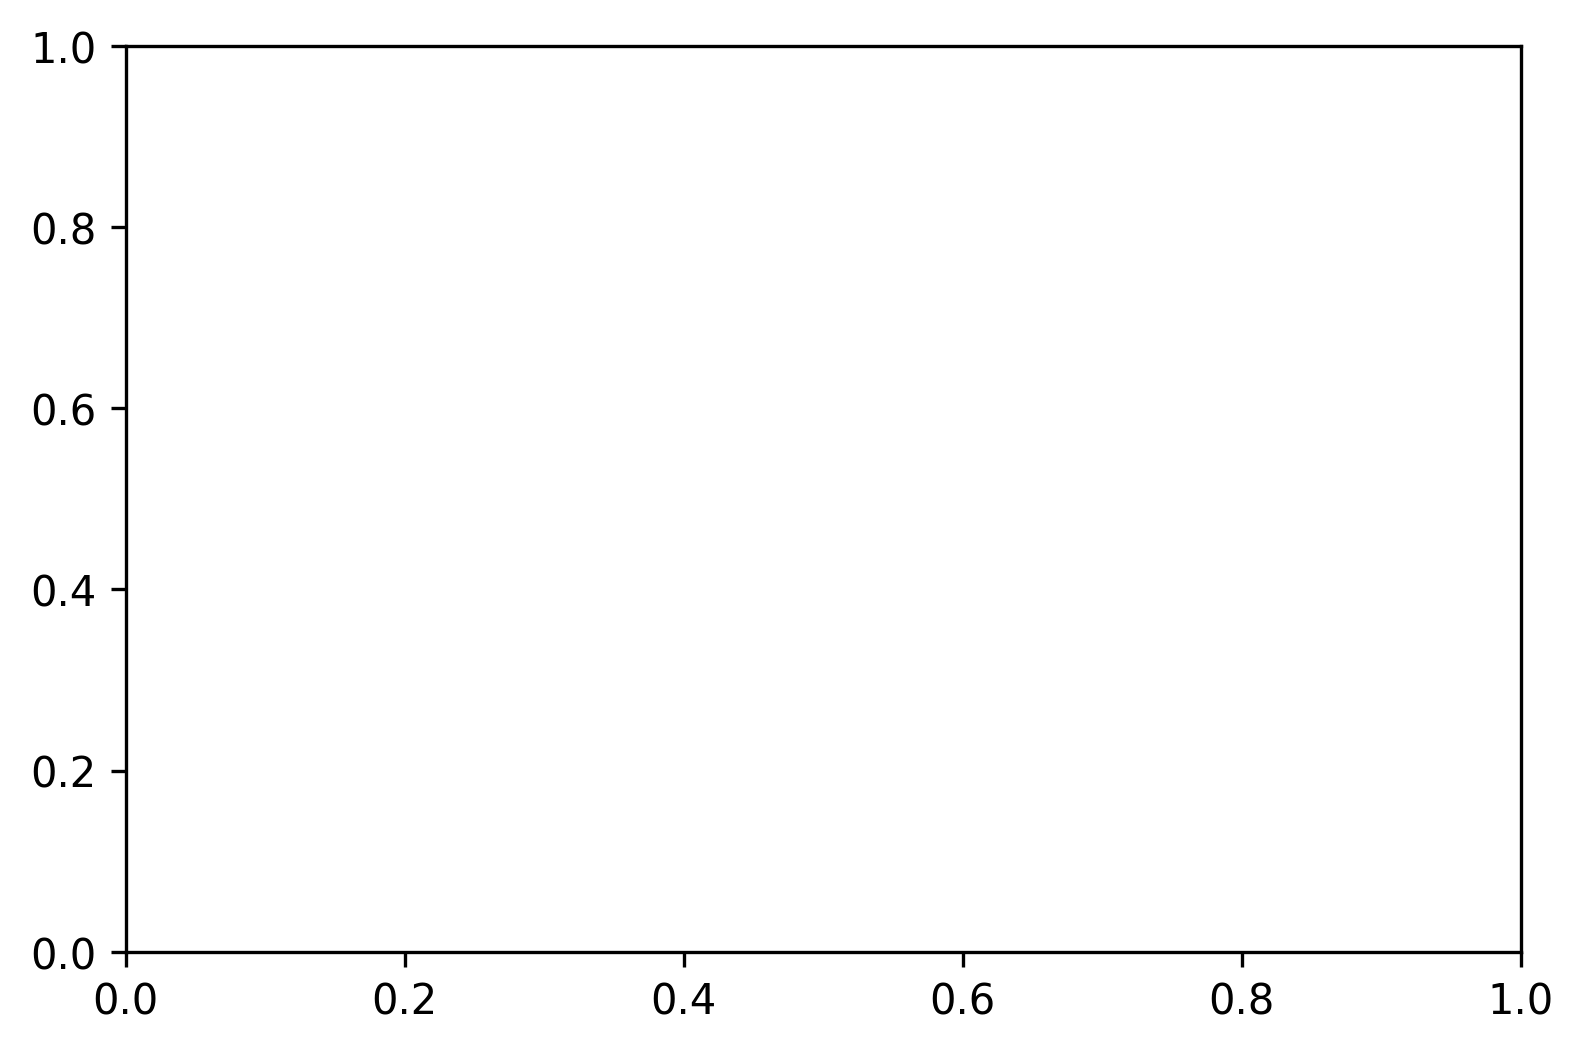

In [75]:
plt.scatter(np.arange(n).reshape(-1,1),np.sort(U[:,1].reshape(-1)))

In [80]:
np.sort(U[:,1].reshape(-1,1)).shape

(500, 1)

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

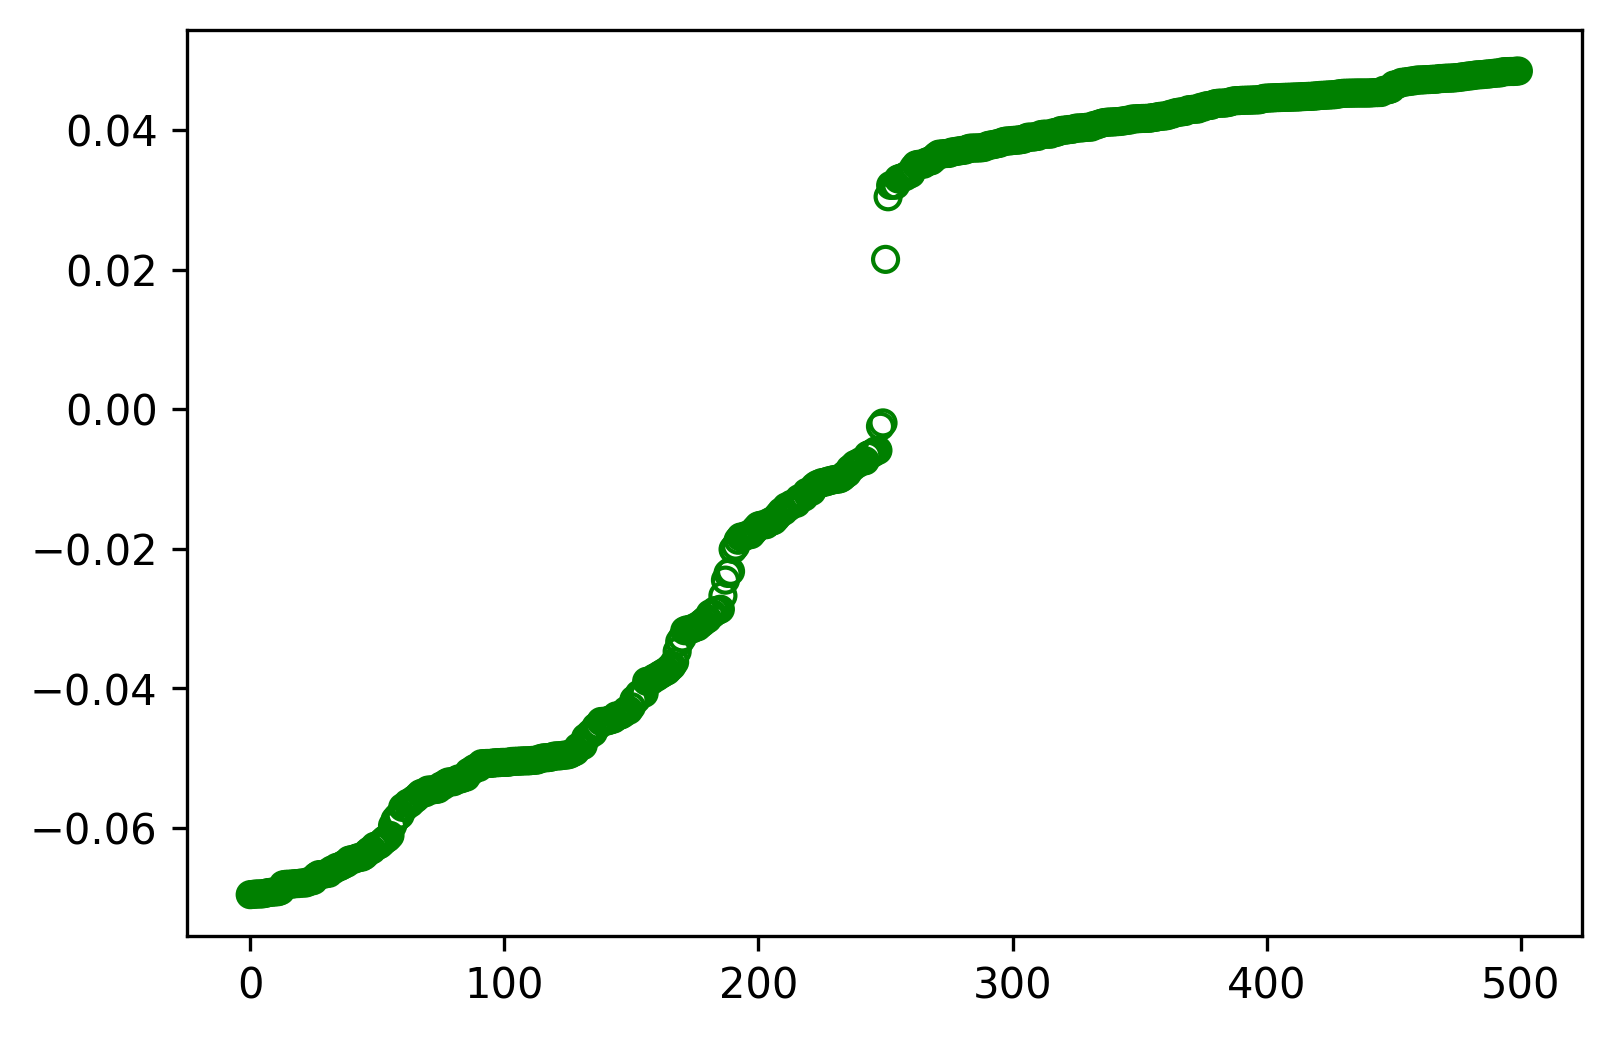

In [130]:
sorted_l2 = np.sort(np.asarray(U[:,1]).T).reshape(-1)
plt.scatter(np.arange(n), sorted_l2, facecolors = 'none',edgecolors='g')
plt.xlabel

In [115]:
sorted_l2 = np.sort(U[:,1])
np.asarray(U[:,1]).reshape(-1)[0]

-0.06921638896765438

In [122]:
np.sort(np.asarray(U[:,1]).T).reshape(-1)

array([-0.06954717, -0.06951871, -0.06946502, -0.06945219, -0.06944811,
       -0.06942792, -0.06936569, -0.06925432, -0.06921639, -0.06917506,
       -0.06914406, -0.06912431, -0.06898382, -0.06813513, -0.06806932,
       -0.06806118, -0.06804695, -0.06800792, -0.06796249, -0.0679576 ,
       -0.06788112, -0.06788059, -0.06786832, -0.06765832, -0.06761232,
       -0.0675058 , -0.06693126, -0.06668514, -0.06666049, -0.06662125,
       -0.06649424, -0.06648332, -0.06603424, -0.06594501, -0.06564863,
       -0.06557903, -0.06539086, -0.06518565, -0.06503616, -0.06459863,
       -0.06453713, -0.06445758, -0.06429791, -0.06420731, -0.06416651,
       -0.06394135, -0.06357278, -0.06325034, -0.06312132, -0.06261511,
       -0.06254041, -0.06236185, -0.0620152 , -0.06167088, -0.06145155,
       -0.06106008, -0.05966506, -0.05884678, -0.05841422, -0.05813897,
       -0.05704871, -0.05699427, -0.05645399, -0.05645297, -0.05603795,
       -0.05580251, -0.05545898, -0.0550913 , -0.05496717, -0.05

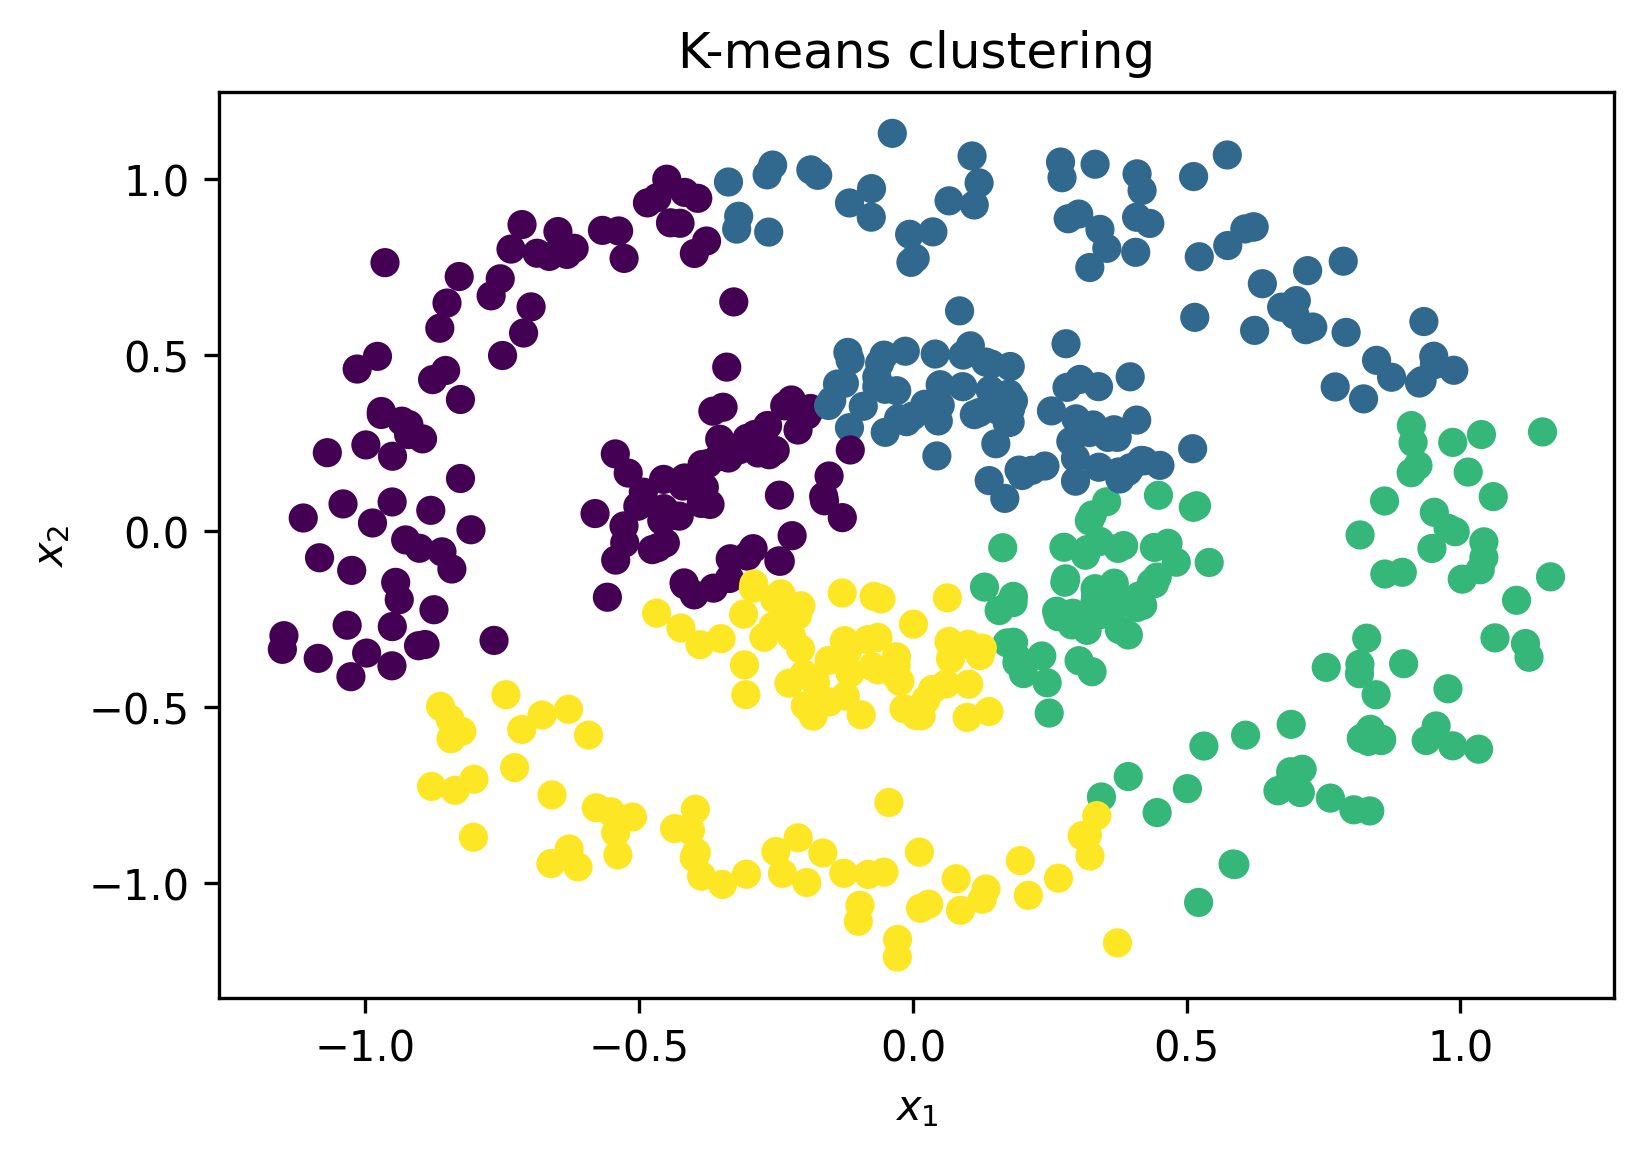

In [131]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X)
label_kmeans = kmeans.labels_
plt.scatter(x=X[:, 0], y=X[:, 1], c=label_kmeans)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("K-means clustering")
plt.show()

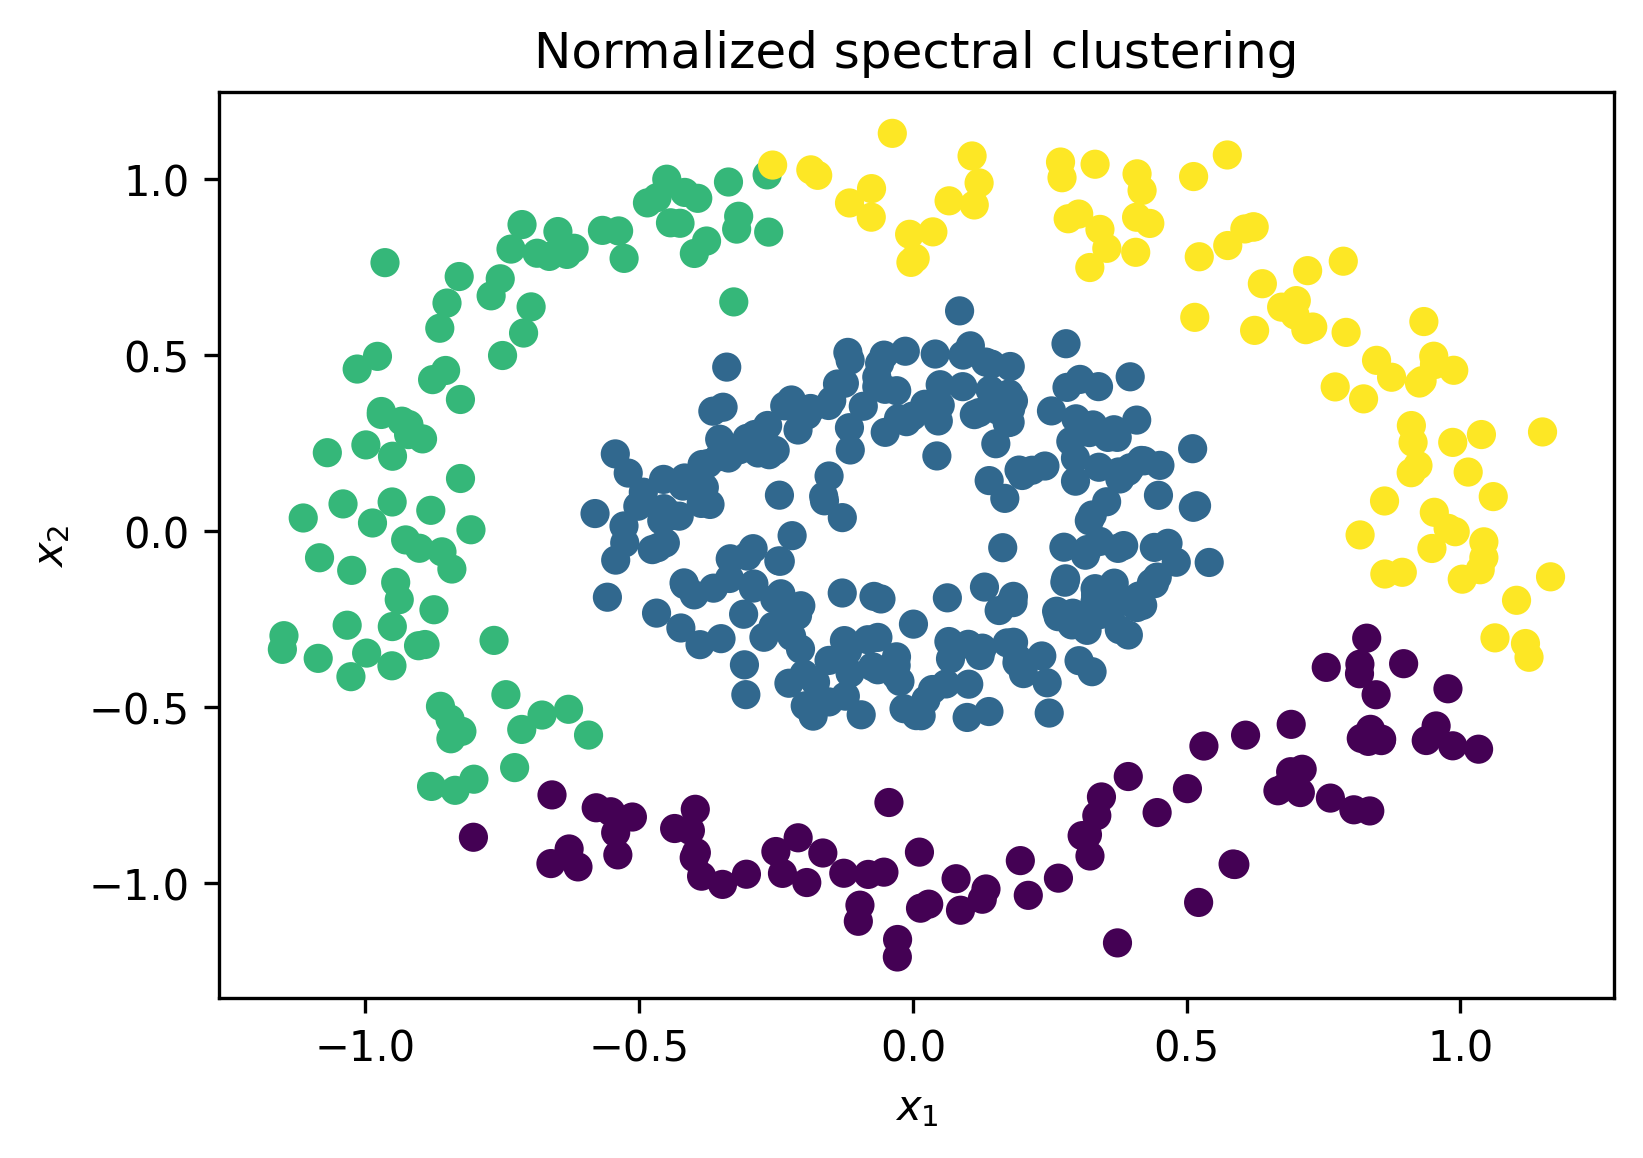

In [377]:
spec_cluster = cluster.SpectralClustering(n_clusters=4,
                                eigen_solver='arpack',
                                affinity='nearest_neighbors',
                                n_neighbors=10)
spec_cluster.fit(X)
label_sc = spec_cluster.labels_
plt.scatter(x=X[:, 0], y=X[:, 1], c=label_sc)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Normalized spectral clustering")
plt.show()


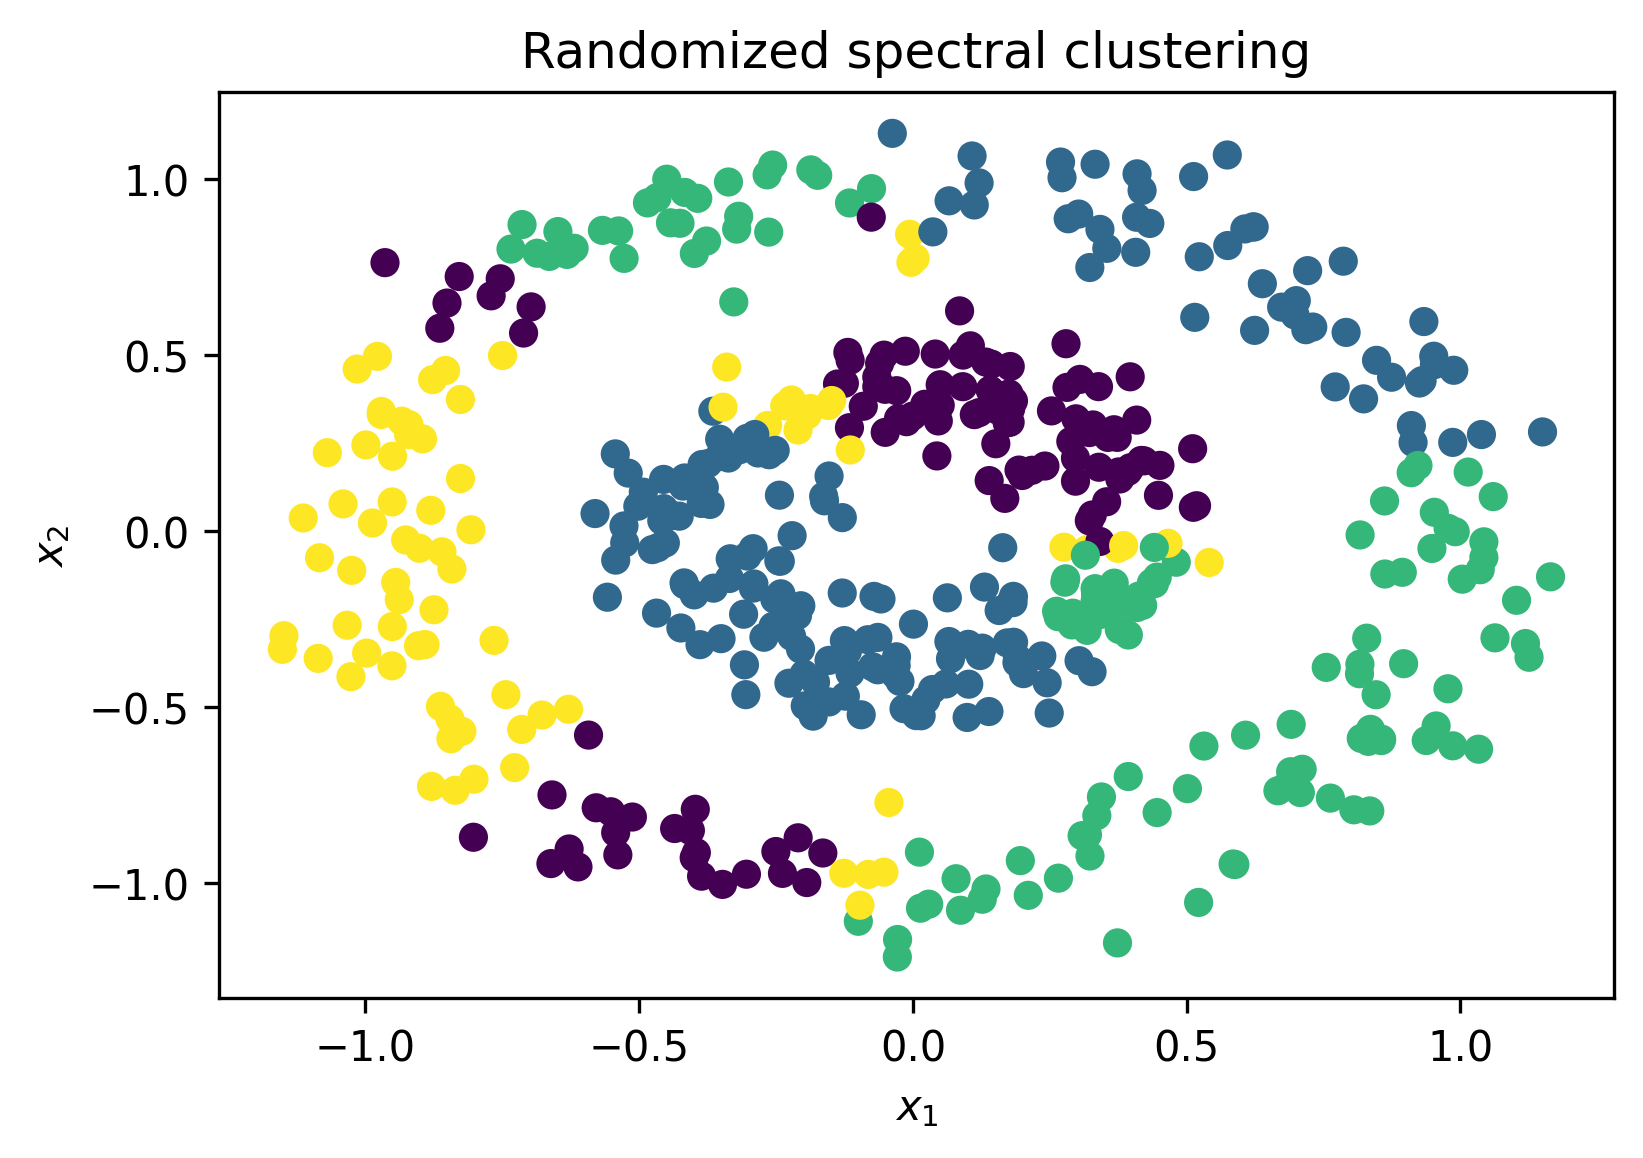

In [387]:
K = 4

Adj_mat = kneighbors_graph(X, n_neighbors=10).toarray()
# print(A)

n = np.shape(Adj_mat)[0]
D = np.diag(np.sum(Adj_mat, axis=1))
L = D - Adj_mat

D_inv = np.diag(1/np.sqrt(np.diag(D)))
L_norm = np.eye(n) - np.dot(D_inv, Adj_mat).dot(D_inv)
Lambdas, V = np.linalg.eig(L_norm)
ind = np.argsort(np.linalg.norm(np.reshape(Lambdas, (1, len(Lambdas))), axis=0))

V_2K = np.real(V[:, ind[:2*K]])

rng = np.random.RandomState(42)
h = int(2*(np.log(K)))
transformer = random_projection.GaussianRandomProjection(n_components = h, random_state=rng)
V_h = transformer.fit_transform(V_2K)

def random_ball(num_points, dimension, radius=1):
    from numpy import random, linalg
    # First generate random directions by normalizing the length of a
    # vector of random-normal values (these distribute evenly on ball).
    random_directions = random.normal(size=(dimension,num_points))
    random_directions /= linalg.norm(random_directions, axis=0)
    # Second generate a random radius with probability proportional to
    # the surface area of a ball with a given radius.
    random_radii = random.random(num_points) ** (1/dimension)
    # Return the list of random (direction & length) points.
    return radius * (random_directions * random_radii).T

centroids = random_ball(K, h)
norm_V = V_h/(np.linalg.norm(V_h,axis=1).reshape(-1,1))

r = np.shape(centroids)[0]
dist = np.zeros((n,r))
for i in range(r):
    dist[:,i] = np.linalg.norm(norm_V - centroids[i,:],axis=1)

label_1 = np.argmin(dist,axis=1)

# label_1[label_1 == 3] = 1
plt.scatter(x=X[:, 0], y=X[:, 1], c=label_1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Randomized spectral clustering")
plt.show()

# plt.colorbar()


'Graph named "Zachary\'s Karate Club" with 34 nodes and 78 edges'

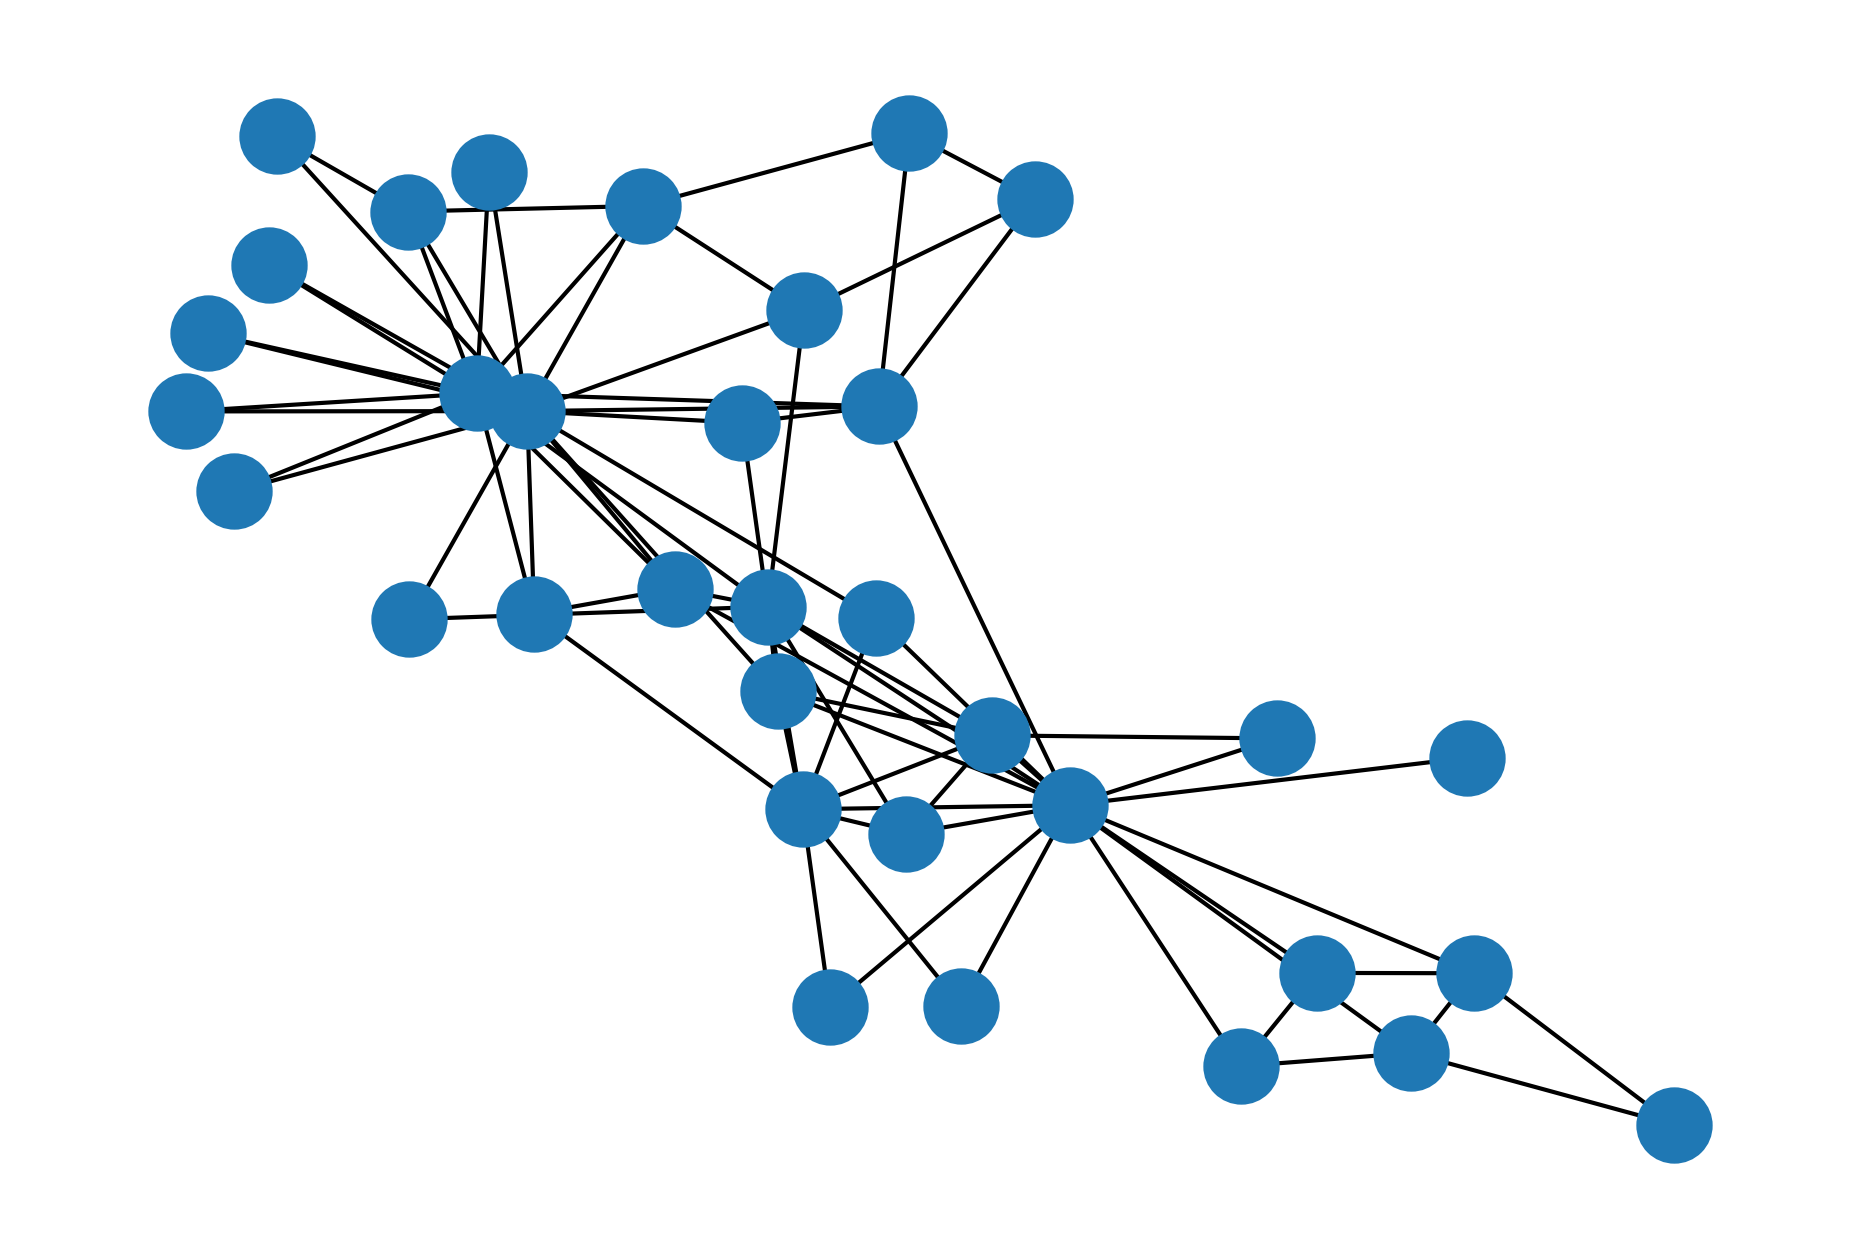

In [388]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G)
nx.info(G)


In [389]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data


In [390]:
G

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

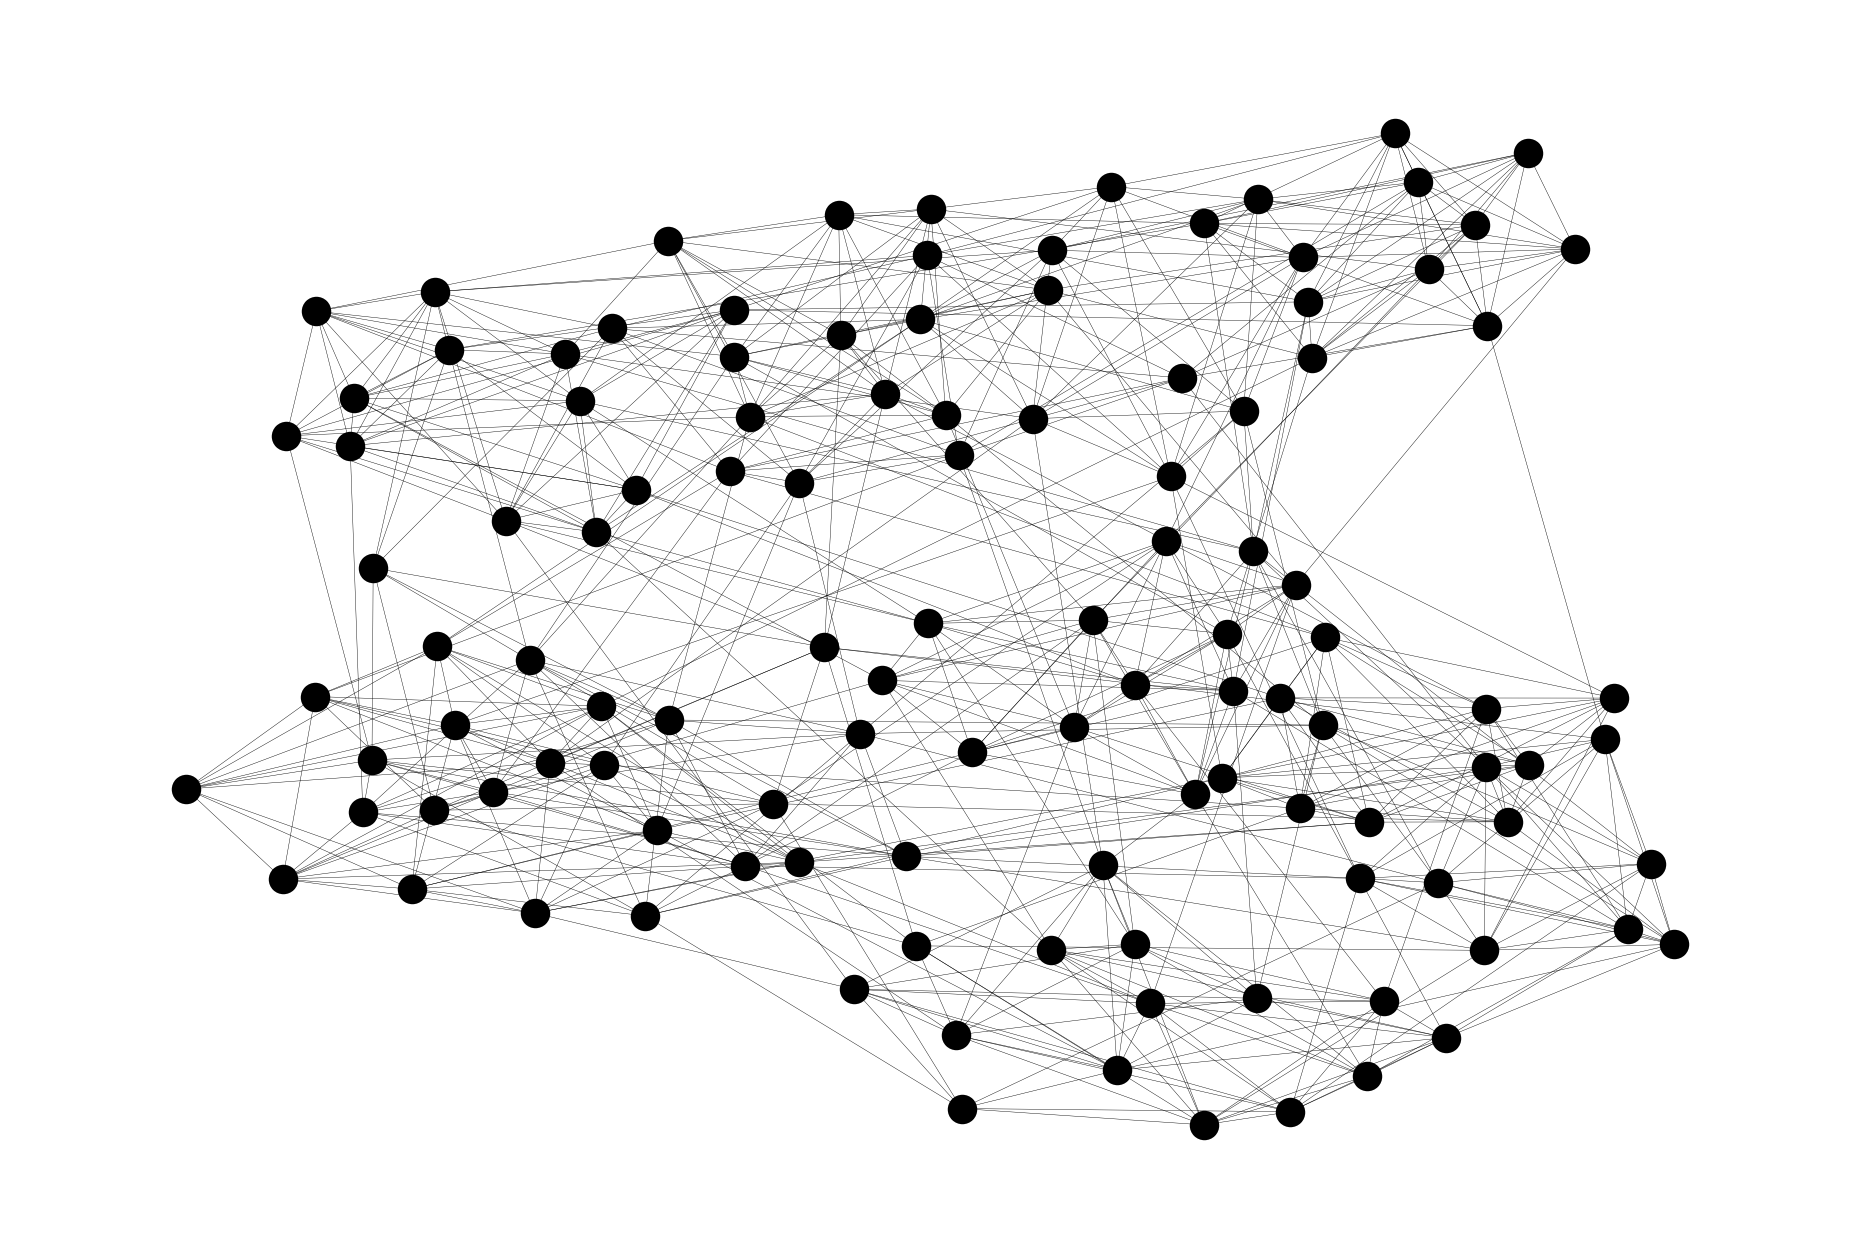

In [391]:
print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()


node degree clustering
0 4 0.3333333333333333
1 5 0.3
2 4 0.16666666666666666
3 4 0.5
4 4 0.16666666666666666
5 2 0
6 2 0
7 5 0.3
8 5 0.2
9 5 0.3

the adjacency list
0 8 2 9 1
1 2 4 9 3
2 7 6
3 9 8 7
4 7 6 8
5 8 9
6
7 9 8
8
9


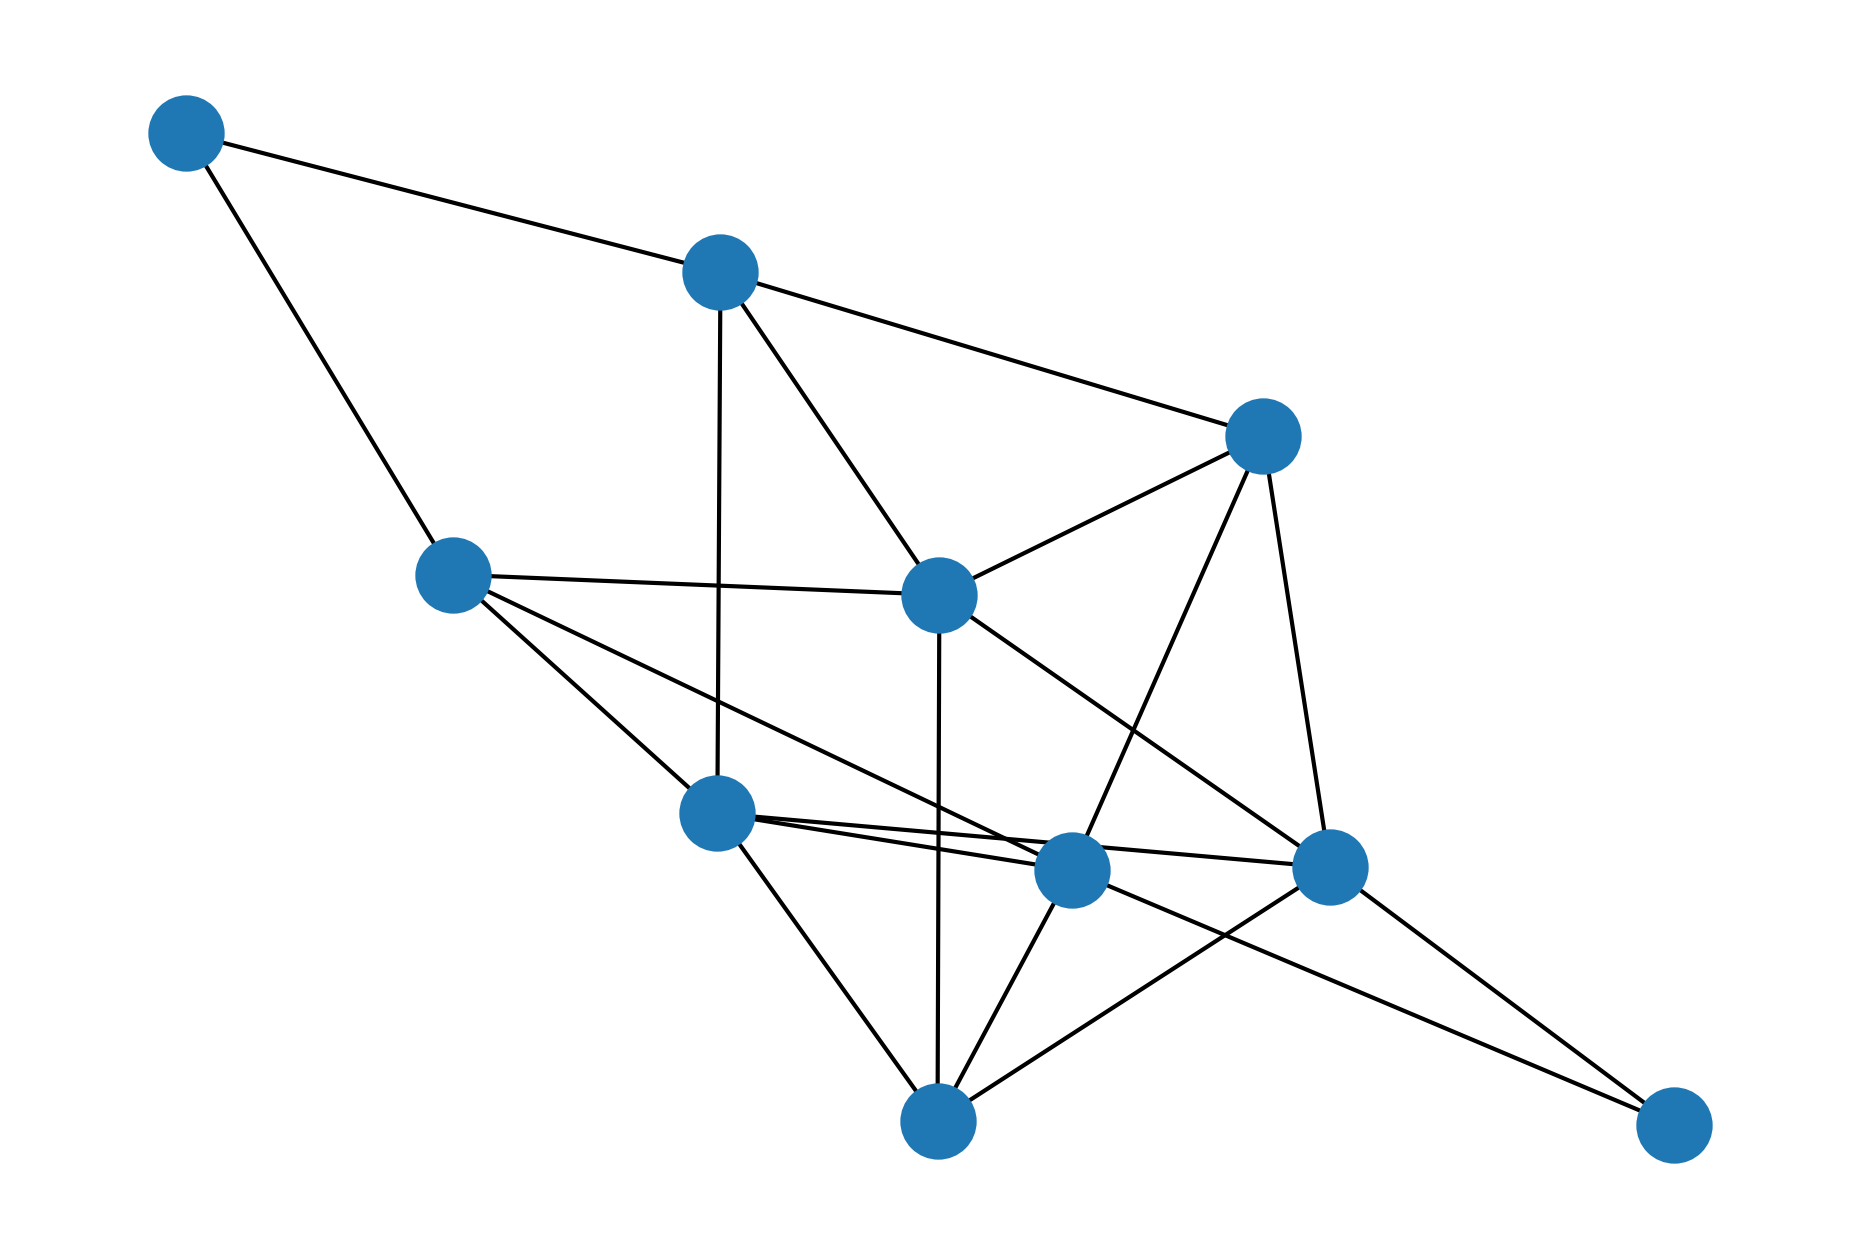

In [392]:
import matplotlib.pyplot as plt
import networkx as nx

n = 10  # 10 nodes
m = 20  # 20 edges
seed = 20160  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

# some properties
print("node degree clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw(G, pos=pos)
plt.show()


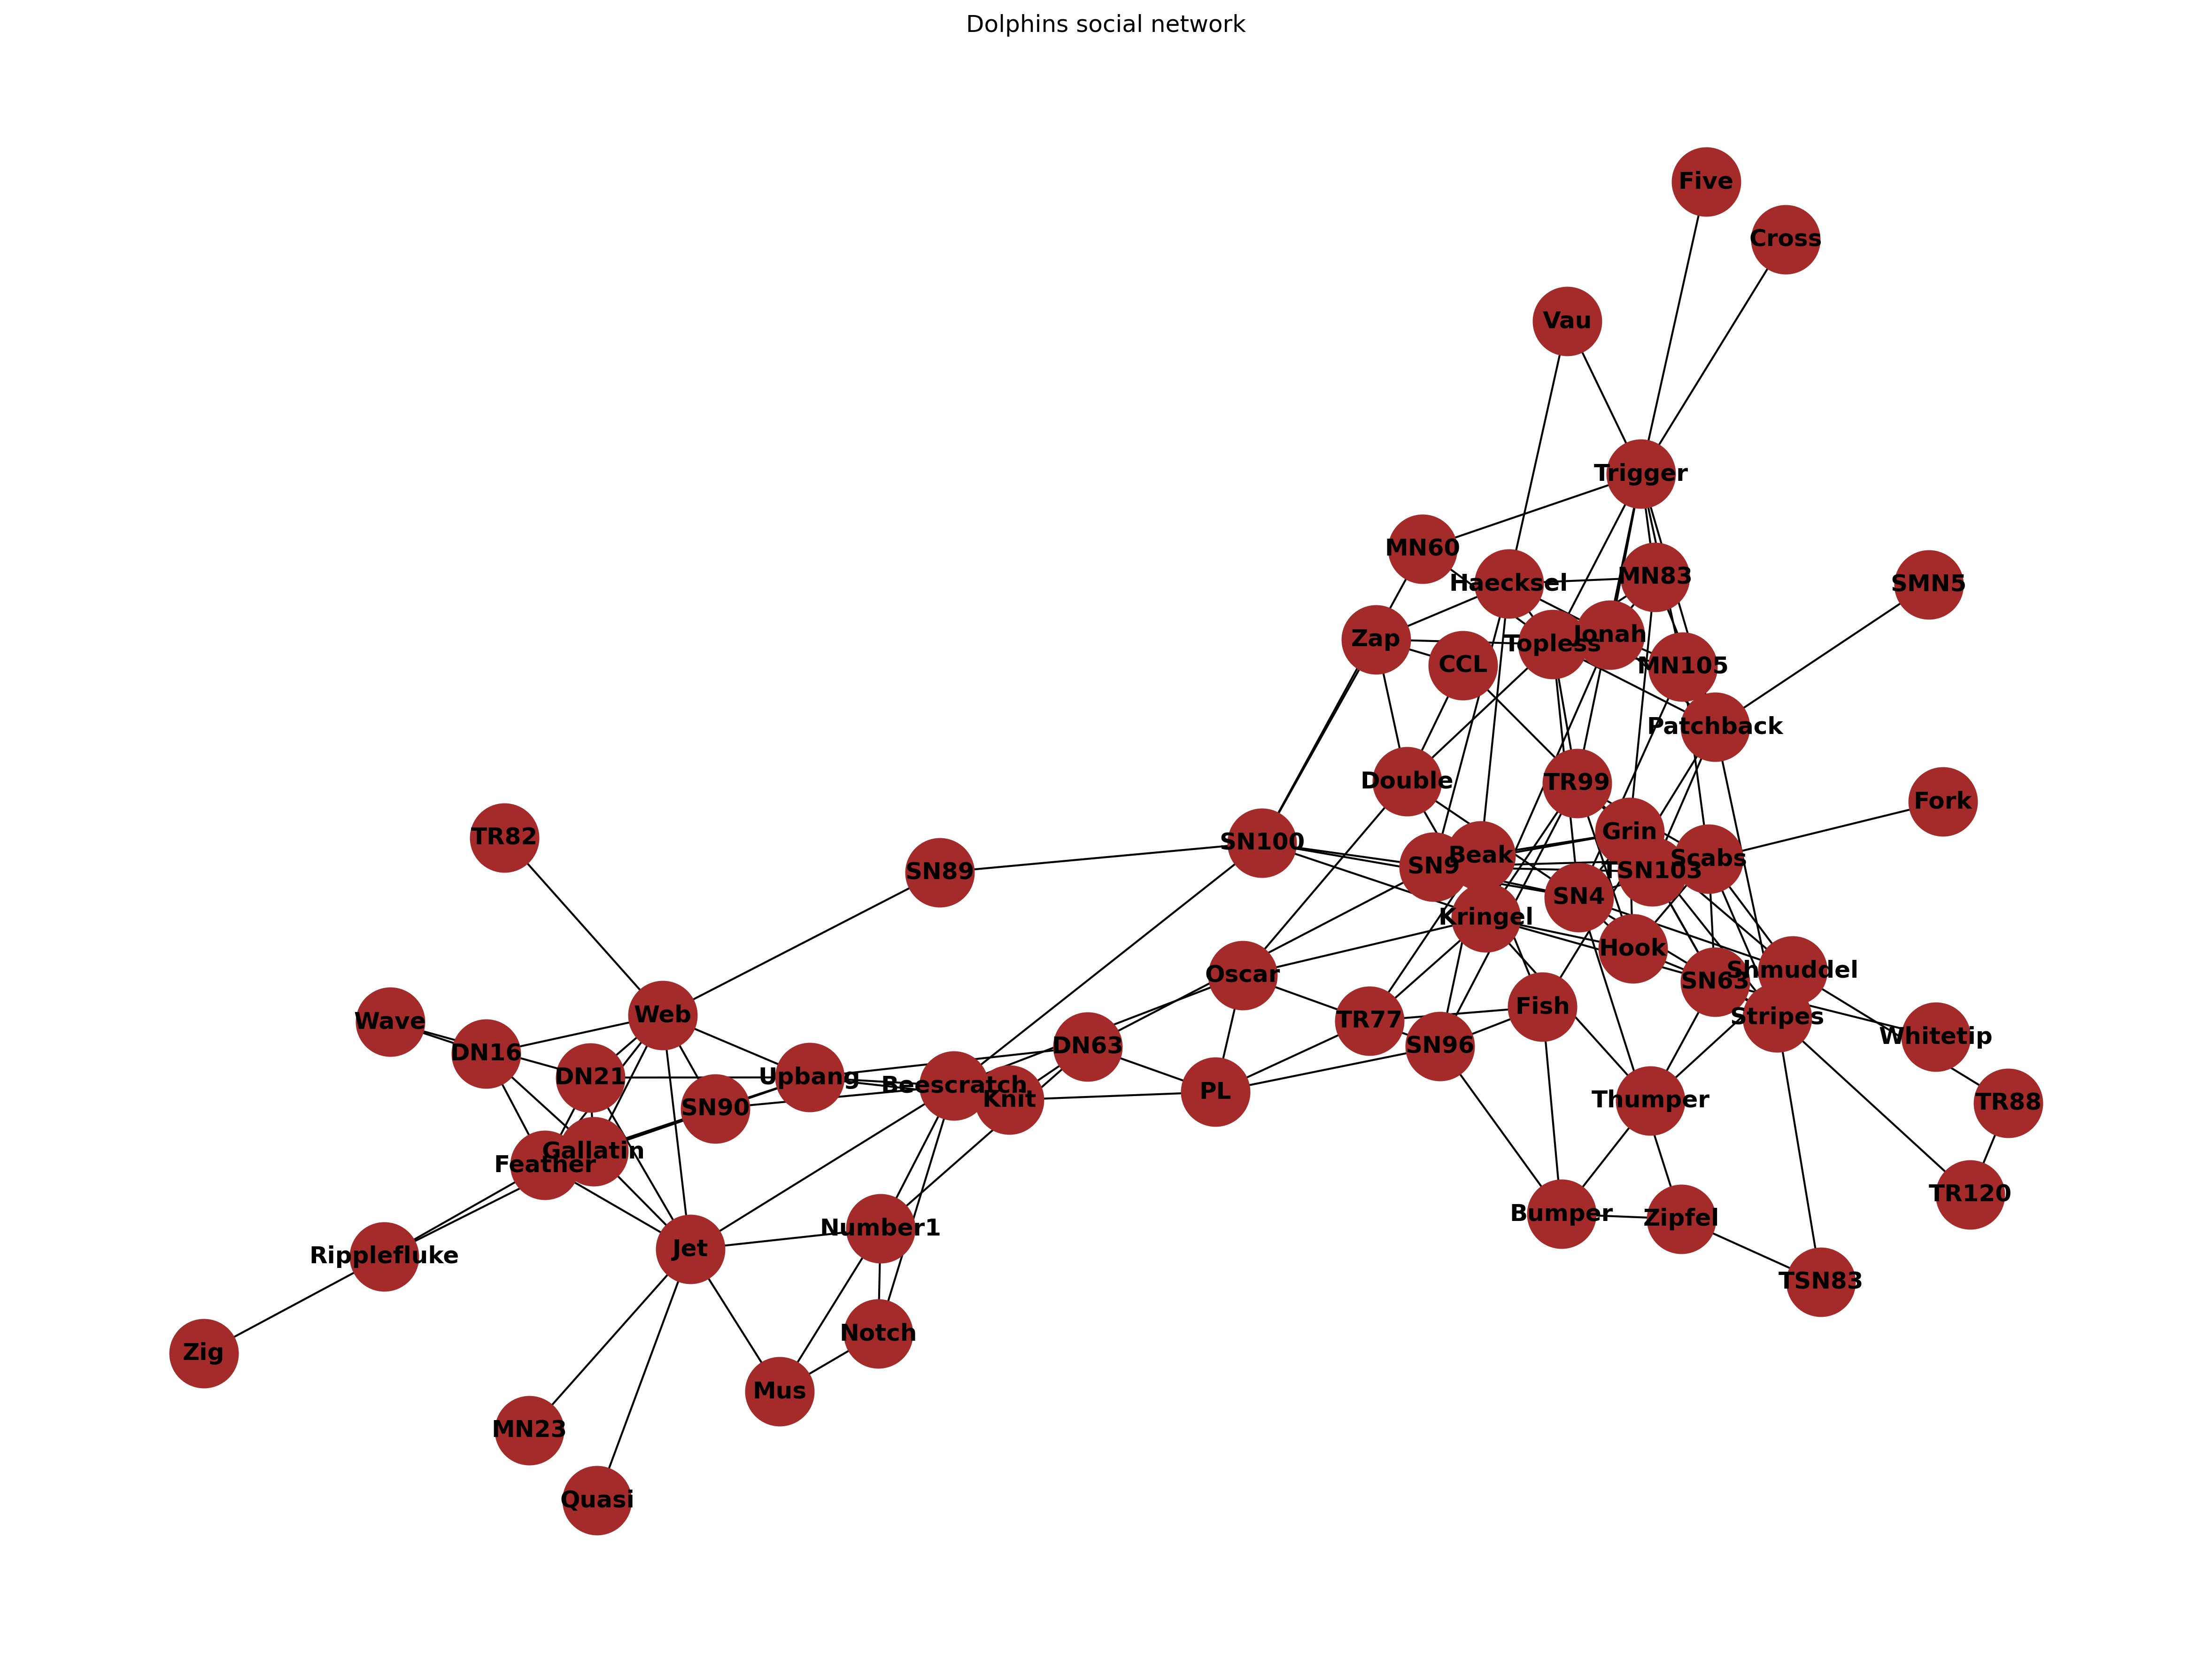

In [398]:
plt.figure(1,figsize=(20,15))
plt.title("Dolphins social network")
dolphin_graph = nx.Graph()
data = nx.read_gml("dolphins.gml")
nx.draw(data,with_labels=True,font_weight='bold',font_color='black',node_color='brown',node_size=1190)
plt.show()


In [399]:
labels = {}
labels_list = list(data.nodes())
for i in range(len(list(data.nodes()))):
    labels[i] = labels_list[i]


In [400]:
labels

{0: 'Beak',
 1: 'Beescratch',
 2: 'Bumper',
 3: 'CCL',
 4: 'Cross',
 5: 'DN16',
 6: 'DN21',
 7: 'DN63',
 8: 'Double',
 9: 'Feather',
 10: 'Fish',
 11: 'Five',
 12: 'Fork',
 13: 'Gallatin',
 14: 'Grin',
 15: 'Haecksel',
 16: 'Hook',
 17: 'Jet',
 18: 'Jonah',
 19: 'Knit',
 20: 'Kringel',
 21: 'MN105',
 22: 'MN23',
 23: 'MN60',
 24: 'MN83',
 25: 'Mus',
 26: 'Notch',
 27: 'Number1',
 28: 'Oscar',
 29: 'Patchback',
 30: 'PL',
 31: 'Quasi',
 32: 'Ripplefluke',
 33: 'Scabs',
 34: 'Shmuddel',
 35: 'SMN5',
 36: 'SN100',
 37: 'SN4',
 38: 'SN63',
 39: 'SN89',
 40: 'SN9',
 41: 'SN90',
 42: 'SN96',
 43: 'Stripes',
 44: 'Thumper',
 45: 'Topless',
 46: 'TR120',
 47: 'TR77',
 48: 'TR82',
 49: 'TR88',
 50: 'TR99',
 51: 'Trigger',
 52: 'TSN103',
 53: 'TSN83',
 54: 'Upbang',
 55: 'Vau',
 56: 'Wave',
 57: 'Web',
 58: 'Whitetip',
 59: 'Zap',
 60: 'Zig',
 61: 'Zipfel'}

No of eigen values near 0 = 2 => no of communities = 2 => input to k means n_clusters = 2


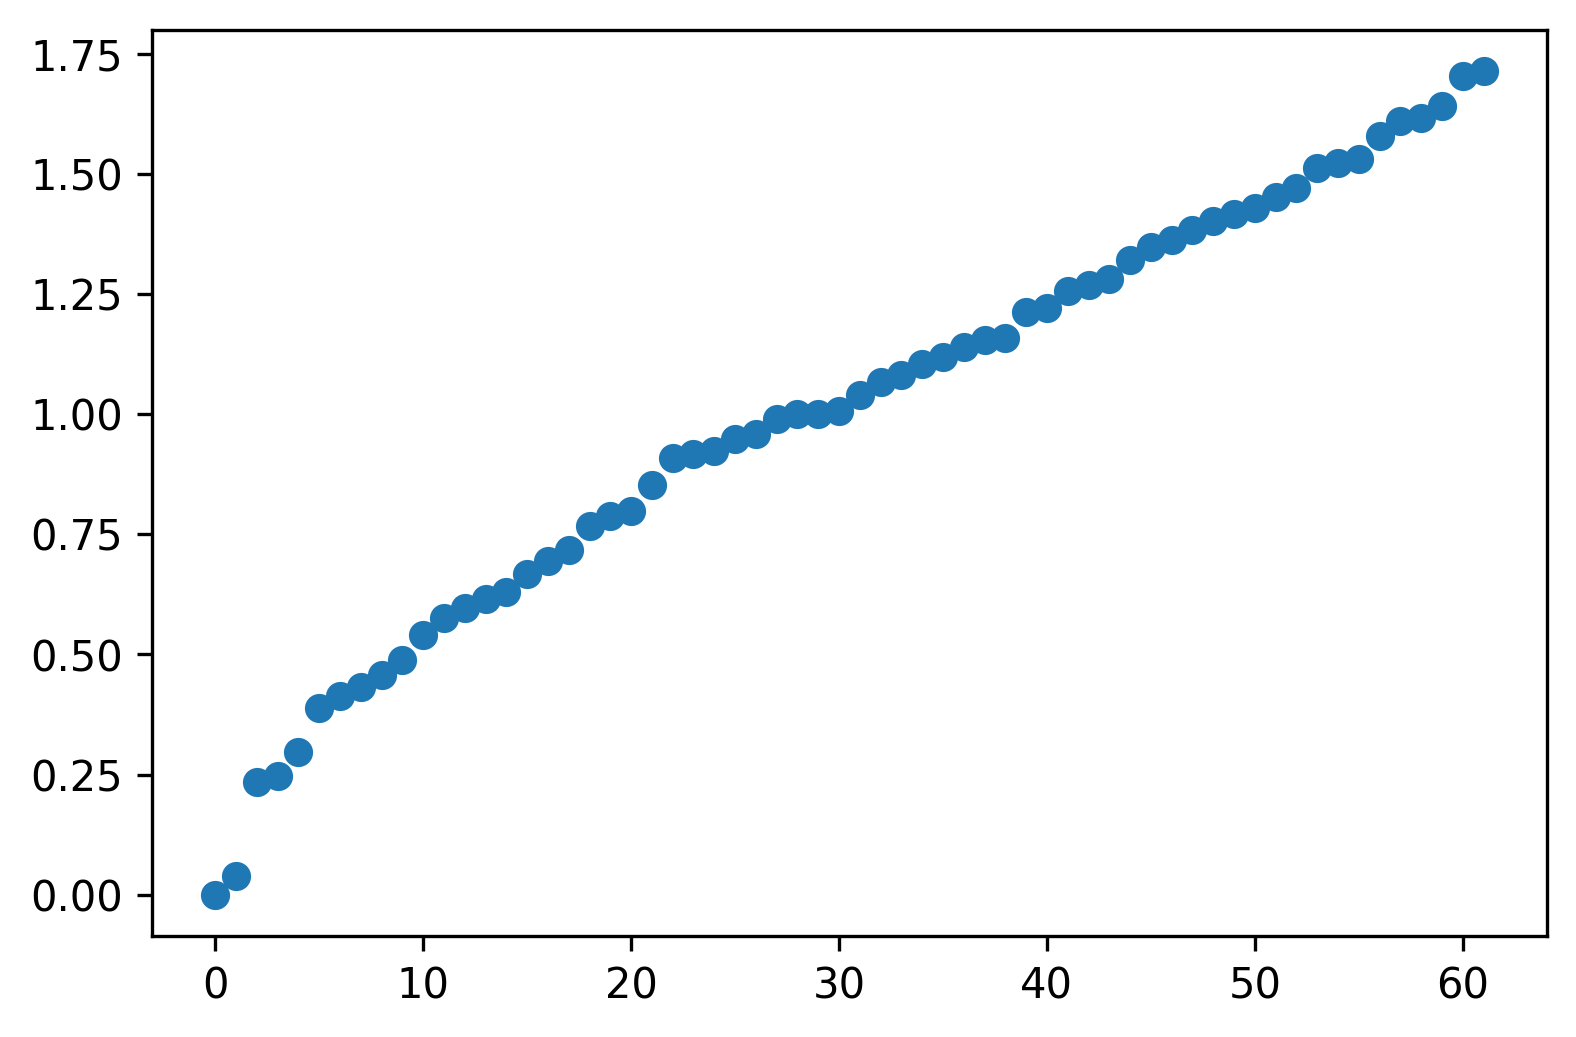

In [401]:
#extracting numpy adjacency matrix out of graph
dolphin_matrix = nx.to_numpy_matrix(data)

#making degree matrix
dolphin_degree = np.zeros([62,62])
degrees = dolphin_matrix.sum(axis=1)
for i in range(len(dolphin_matrix)):
    for j in range(len(dolphin_matrix)):
        if i==j:
            dolphin_degree[i][j] = degrees[i]


#making normalized dolphin laplacian matrix

identity_matrix = np.identity(62)
for i in range(len(dolphin_degree)):
    dolphin_degree[i][i] = 1/np.sqrt(dolphin_degree[i][i])

temp = np.matmul(dolphin_degree,dolphin_matrix)
norm_laplacian = identity_matrix - np.matmul(temp,dolphin_degree)

#------EIGEN VALUES, EIGEN VECTORS OF NORMALIZED LAPLACIAN & CALCULATION OF FIEDLER VECTOR
eigenvals, eiganvecs = np.linalg.eig(norm_laplacian)
# sort these based on the eigenvalues
#print(eigenvals)
#print(eiganvecs)
eigenvecs = eiganvecs[:,np.argsort(eigenvals)]
eigenvals = eigenvals[np.argsort(eigenvals)]
x = np.arange(0,62)
#we see two eigen values near 0 hence possible no of clusters = 2 which will be input to k-means => k=2
print("No of eigen values near 0 = 2 => no of communities = 2 => input to k means n_clusters = 2")
plt.scatter(x,eigenvals) 
plt.show()
#print(eigenvals)


In [402]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(eigenvecs[:,1:2])
colors = kmeans.labels_


/Users/zhangzheyu/opt/anaconda3/envs/sc/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


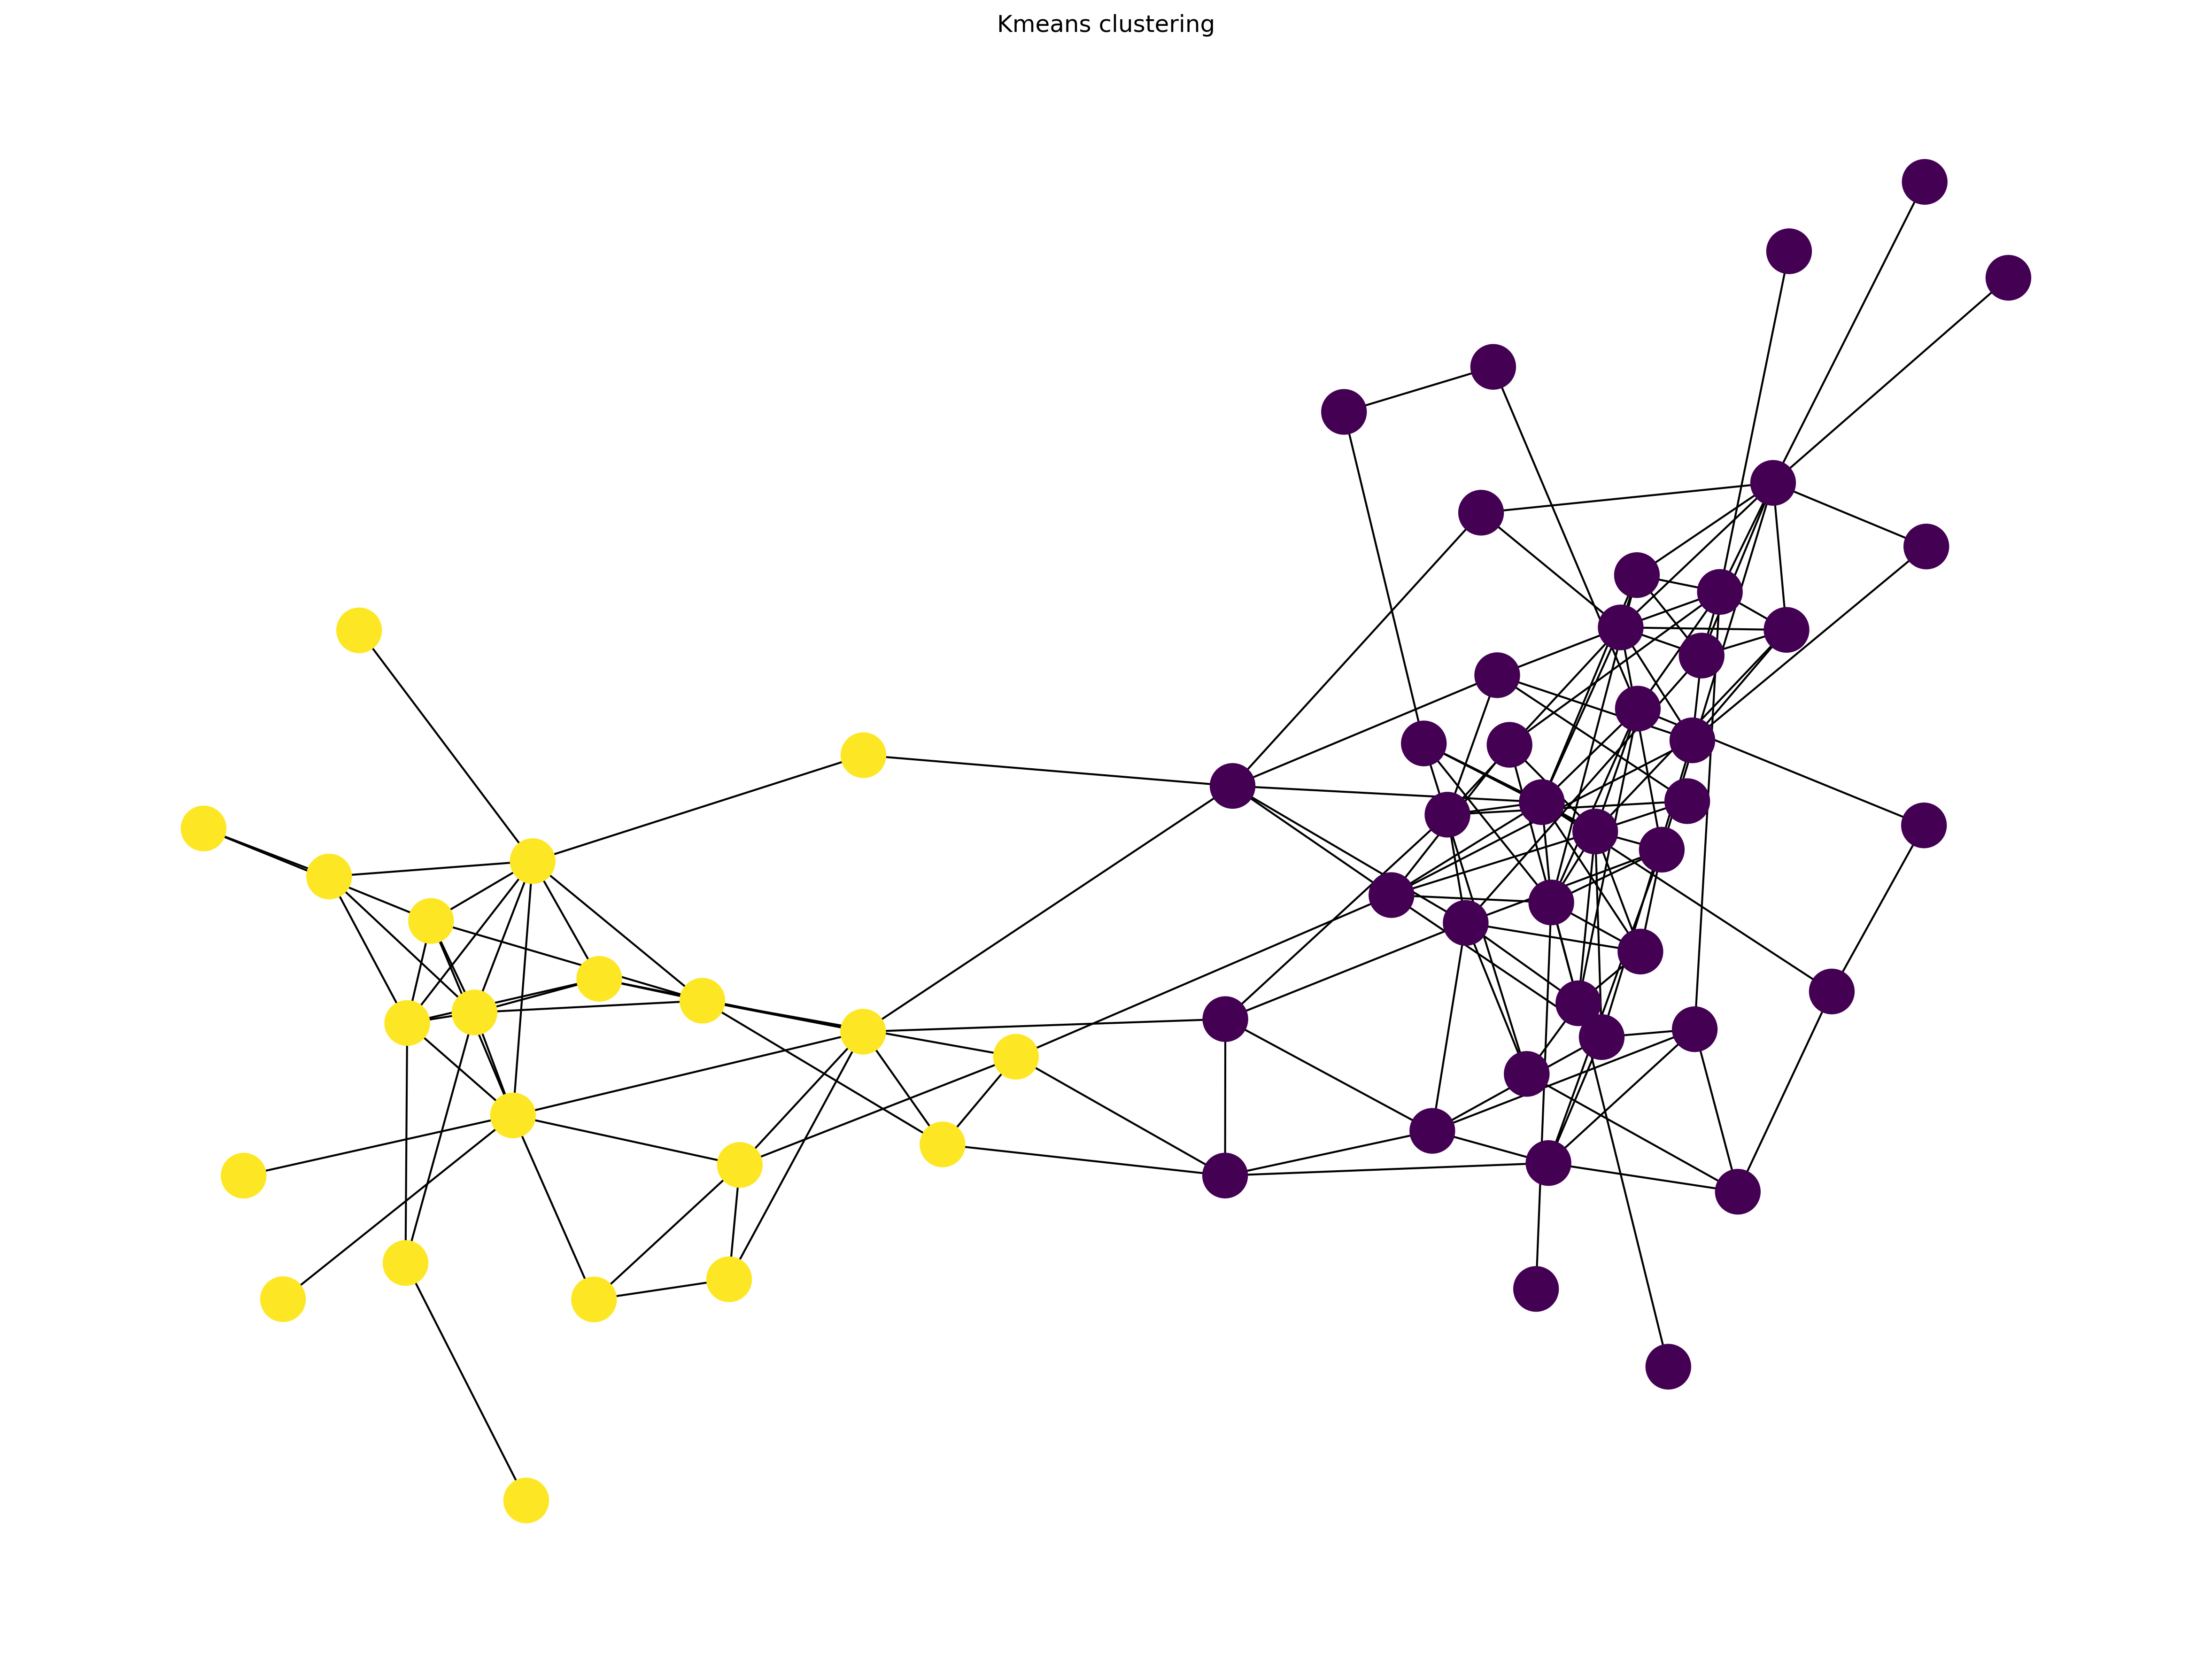

In [409]:
g = nx.from_numpy_matrix(dolphin_matrix)
plt.figure(1,figsize=(20,15))
plt.title("Kmeans clustering")
dolphin_graph_r = nx.Graph()
nx.draw(g,font_weight='bold',font_color='black',node_color=colors,node_size=500)


In [410]:
spec_cluster = cluster.SpectralClustering(n_clusters=2,
                                affinity='precomputed',
                                n_neighbors=10)
spec_cluster.fit(nx.to_numpy_matrix(data))
label_sc = spec_cluster.labels_


/Users/zhangzheyu/opt/anaconda3/envs/sc/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


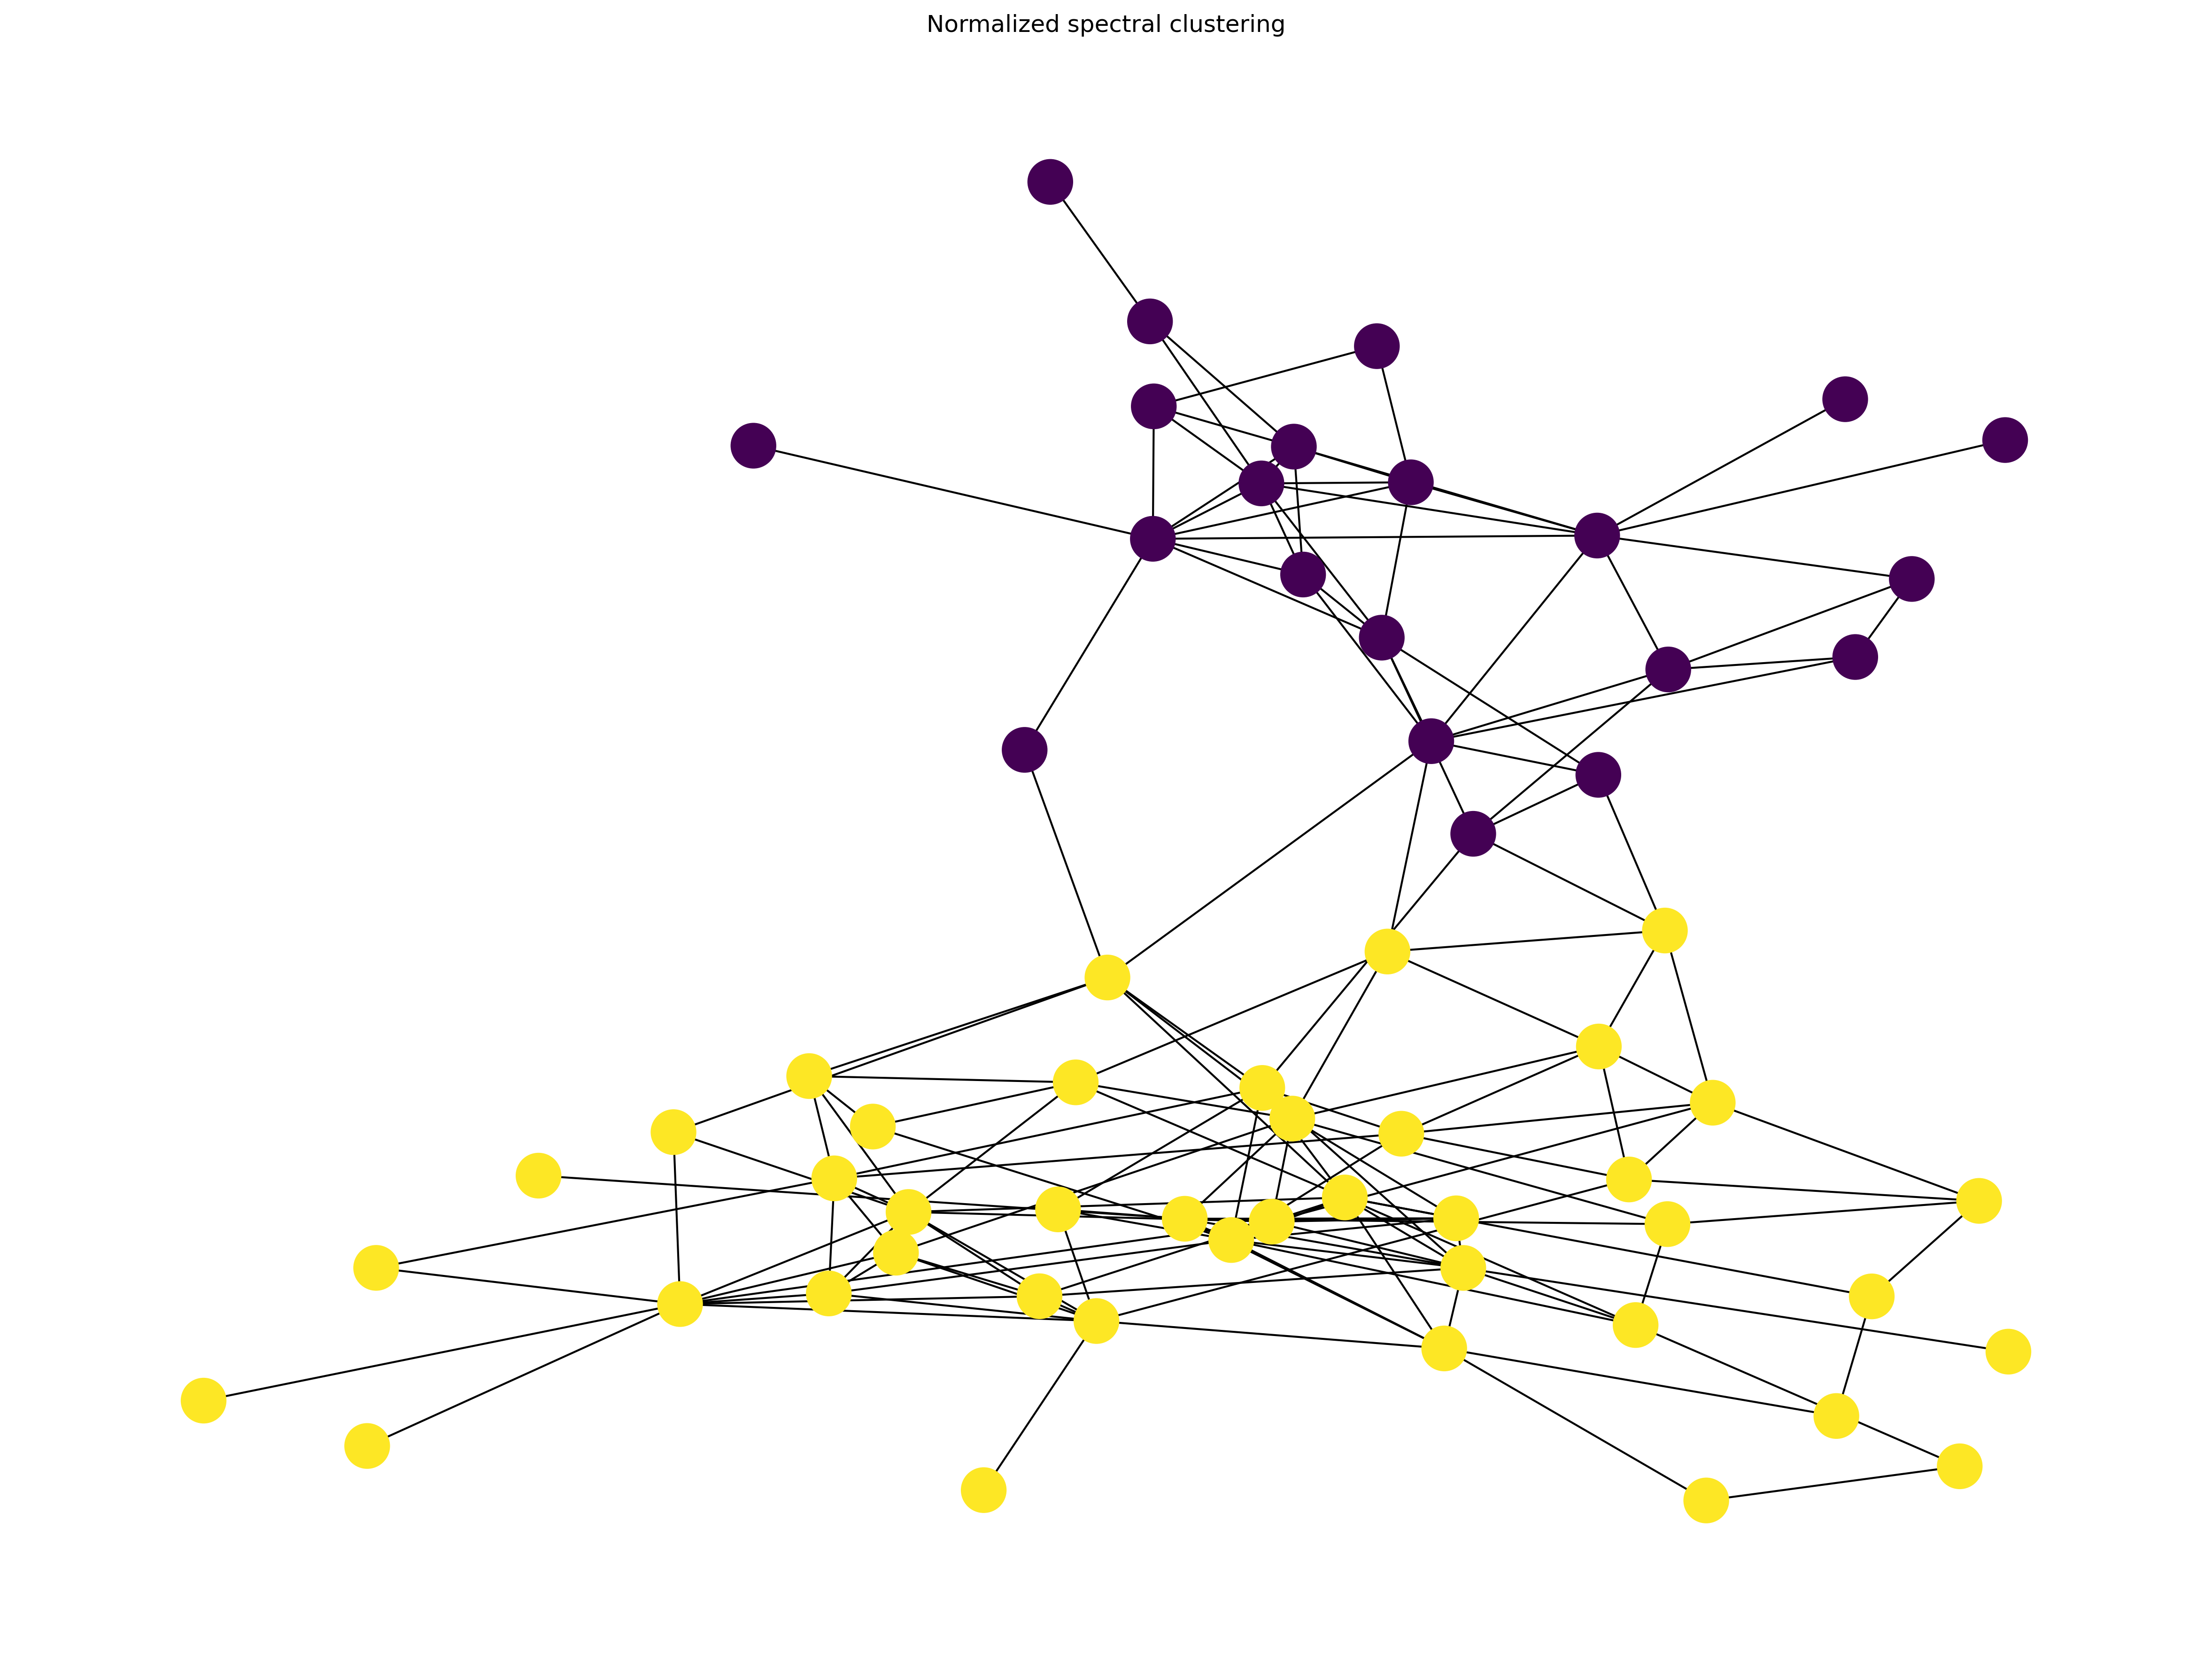

In [412]:
plt.figure(1,figsize=(20,15))
plt.title("Normalized spectral clustering")
dolphin_graph_r = nx.Graph()
nx.draw(g,font_weight='bold',font_color='black',node_color=label_sc,node_size=500)


In [413]:
K = 2

Adj_mat = nx.to_numpy_matrix(data)
# print(A)

n = np.shape(Adj_mat)[0]
D = np.diag(np.asarray(np.sum(Adj_mat, axis=1)).reshape(-1))
L = D - Adj_mat

D_inv = np.diag(1/np.sqrt(np.diag(D)))
L_norm = np.eye(n) - np.dot(D_inv, Adj_mat).dot(D_inv)
Lambdas, V = np.linalg.eig(L_norm)
ind = np.argsort(np.linalg.norm(np.reshape(Lambdas, (1, len(Lambdas))), axis=0))

V_2K = np.real(V[:, ind[:2*K]])

rng = np.random.RandomState(42)
h = int(5*(np.log(K)))
transformer = random_projection.GaussianRandomProjection(n_components = h, random_state=rng)
V_h = transformer.fit_transform(V_2K)

def random_ball(num_points, dimension, radius=1):
    from numpy import random, linalg
    # First generate random directions by normalizing the length of a
    # vector of random-normal values (these distribute evenly on ball).
    random_directions = random.normal(size=(dimension,num_points))
    random_directions /= linalg.norm(random_directions, axis=0)
    # Second generate a random radius with probability proportional to
    # the surface area of a ball with a given radius.
    random_radii = random.random(num_points) ** (1/dimension)
    # Return the list of random (direction & length) points.
    return radius * (random_directions * random_radii).T

centroids = random_ball(K, h)
norm_V = V_h/(np.linalg.norm(V_h,axis=1).reshape(-1,1))

r = np.shape(centroids)[0]
dist = np.zeros((n,r))
for i in range(r):
    dist[:,i] = np.linalg.norm(norm_V - centroids[i,:],axis=1)

label_1 = np.argmin(dist,axis=1)

plt.figure(1,figsize=(20,15))
plt.title("Randomized spectral clustering")
dolphin_graph_r = nx.Graph()
nx.draw(g,font_weight='bold',font_color='black',node_color=label_1,node_size=500)

# label_1[label_1 == 3] = 1
# plt.scatter(x=X[:, 0], y=X[:, 1], c=label_1)
# plt.xlabel("$x_1$")
# plt.ylabel("$x_2$")
# plt.title("Randomized spectral clustering")
# plt.show()


ValueError: shapes (1,) and (62,62) not aligned: 1 (dim 0) != 62 (dim 0)

In [417]:
D_inv

array([0.40824829])

In [418]:
np.diag(np.sum(Adj_mat, axis=1))


array([6.])

In [426]:
np.diag(np.asarray(np.sum(Adj_mat, axis=1)).reshape(-1))

array([[6., 0., 0., ..., 0., 0., 0.],
       [0., 8., 0., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 5., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 3.]])

matrix([[ 6.],
        [ 8.],
        [ 4.],
        [ 3.],
        [ 1.],
        [ 4.],
        [ 6.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 5.],
        [ 1.],
        [ 1.],
        [ 8.],
        [12.],
        [ 7.],
        [ 6.],
        [ 9.],
        [ 7.],
        [ 4.],
        [ 9.],
        [ 6.],
        [ 1.],
        [ 3.],
        [ 6.],
        [ 3.],
        [ 3.],
        [ 5.],
        [ 5.],
        [ 9.],
        [ 5.],
        [ 1.],
        [ 3.],
        [10.],
        [ 5.],
        [ 1.],
        [ 7.],
        [11.],
        [ 8.],
        [ 2.],
        [ 8.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 4.],
        [11.],
        [ 2.],
        [ 6.],
        [ 1.],
        [ 2.],
        [ 7.],
        [10.],
        [ 4.],
        [ 2.],
        [ 7.],
        [ 2.],
        [ 2.],
        [ 9.],
        [ 1.],
        [ 5.],
        [ 1.],
        [ 3.]])